# Segunda lista - Problema grupal 1

## Componentes del grupo

* Pol Casacuberta Gil
* Joaquin Faraone Prieto
* Agnès Felip i Díaz
* Marta Granero i Martí

## Predicción del uso de bicicletas

### El uso compartido de bicicletas es un servicio proporcionado por cualquier ciudad importante del mundo, por lo que comprender y predecir el comportamiento del sistema es un elemento clave. Vamos a trabajar con el conjunto de datos de bicicletas compartidas del repositorio de conjuntos de datos de UCI que recopila estadísticas agregadas de uso de bicicletas junto con otra información adicional relevante. Se pueden descargar los datos desde aquí [https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset)

### El objetivo de este problema es predecir cúantas bicicletas se usarán diáriamente (el archivo day.csv). Podéis leer en el $\texttt{Readme.txt}$ los detalles sobre las variables

### Procedamos con los ejercicios que se nos piden

#### a) El primer paso es preprocesar y preparar los datos antes de ajustar cualquier modelo. Hay algunas variables que no són útiles para el problema o que no tiene sentido usar. Eliminad-las del conjunto de datos. Dividid los datos en conjuntos de entrenamiento y test $(60\%/40\%)$. Haced una exploración mínima del conjunto de datos de entrenamiento observando las relaciones entre las variables, especialmente con la variable objetivo. Describid las cosas que hayáis visto que os parezcan interesantes. Estandarizad las variables(calculad el estandarizador a partir de los datos del entrenamiento y luego aplicadlo a los datos de test).

In [1]:
# Descomentar para actualizar librerias
# Si se actualiza alguna libreria hay que reiniciar el notebook
# !pip install pandas --upgrade --user --quiet
# !pip install numpy --upgrade --user --quiet
# !pip install scipy --upgrade --user --quiet
# !pip install statsmodels --upgrade --user --quiet
# !pip install scikit-learn --upgrade --user --quiet
# !pip install plotly --upgrade --user --quiet
# !pip install apafib --upgrade --user --quiet

#### Imports varios

In [79]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm

from pandas.plotting import scatter_matrix

from sklearn import datasets
from sklearn import set_config
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split,  KFold, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import PoissonRegressor

from sklearn.manifold import TSNE

from sklearn.preprocessing import MinMaxScaler, StandardScaler

from statsmodels.genmod.generalized_linear_model import GLM

from yellowbrick.regressor import AlphaSelection
from yellowbrick.target.feature_correlation import feature_correlation

from scipy import stats

#### Cargamos el conjunto de datos

In [3]:
bicicletas_data = pd.read_csv("./Bike-Sharing-Dataset/day.csv", header=0, delimiter=',')

bicicletas_data.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

#### Breve información sobre las features del conjunto de datos

In [4]:
bicicletas_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


#### Breve estadística descriptiva sobre el conjunto de datos

In [5]:
bicicletas_data.describe(include='all').T

count unique         top freq         mean          std       min  \
instant     731.0    NaN         NaN  NaN        366.0   211.165812       1.0   
dteday        731    731  2011-01-01    1          NaN          NaN       NaN   
season      731.0    NaN         NaN  NaN      2.49658     1.110807       1.0   
yr          731.0    NaN         NaN  NaN     0.500684     0.500342       0.0   
mnth        731.0    NaN         NaN  NaN     6.519836     3.451913       1.0   
holiday     731.0    NaN         NaN  NaN     0.028728     0.167155       0.0   
weekday     731.0    NaN         NaN  NaN     2.997264     2.004787       0.0   
workingday  731.0    NaN         NaN  NaN     0.683995     0.465233       0.0   
weathersit  731.0    NaN         NaN  NaN     1.395349     0.544894       1.0   
temp        731.0    NaN         NaN  NaN     0.495385     0.183051   0.05913   
atemp       731.0    NaN         NaN  NaN     0.474354     0.162961   0.07907   
hum         731.0    NaN         NaN  NaN     0.627894     0.142429       0.0   
windspeed   731.0    NaN         NaN  NaN     0.190486     0.077498  0.022392   
casual      731.0    NaN         NaN  NaN   848.176471   686.622488       2.0   
registered  731.0    NaN         NaN  NaN  3656.172367  1560.256377      20.0   
cnt         731.0    NaN         NaN  NaN  4504.348837  1937.211452      22.0   

                 25%       50%       75%       max  
instant        183.5     366.0     548.5     731.0  
dteday           NaN       NaN       NaN       NaN  
season           2.0       3.0       3.0       4.0  
yr               0.0       1.0       1.0       1.0  
mnth             4.0       7.0      10.0      12.0  
holiday          0.0       0.0       0.0       1.0  
weekday          1.0       3.0       5.0       6.0  
workingday       0.0       1.0       1.0       1.0  
weathersit       1.0       1.0       2.0       3.0  
temp        0.337083  0.498333  0.655417  0.861667  
atemp       0.337842  0.486733  0.608602  0.840896  
hum             0.52  0.626667  0.730209    0.9725  
windspeed    0.13495  0.180975  0.233214  0.507463  
casual         315.5     713.0    1096.0    3410.0  
registered    2497.0    3662.0    4776.5    6946.0  
cnt           3152.0    4548.0    5956.0    8714.0

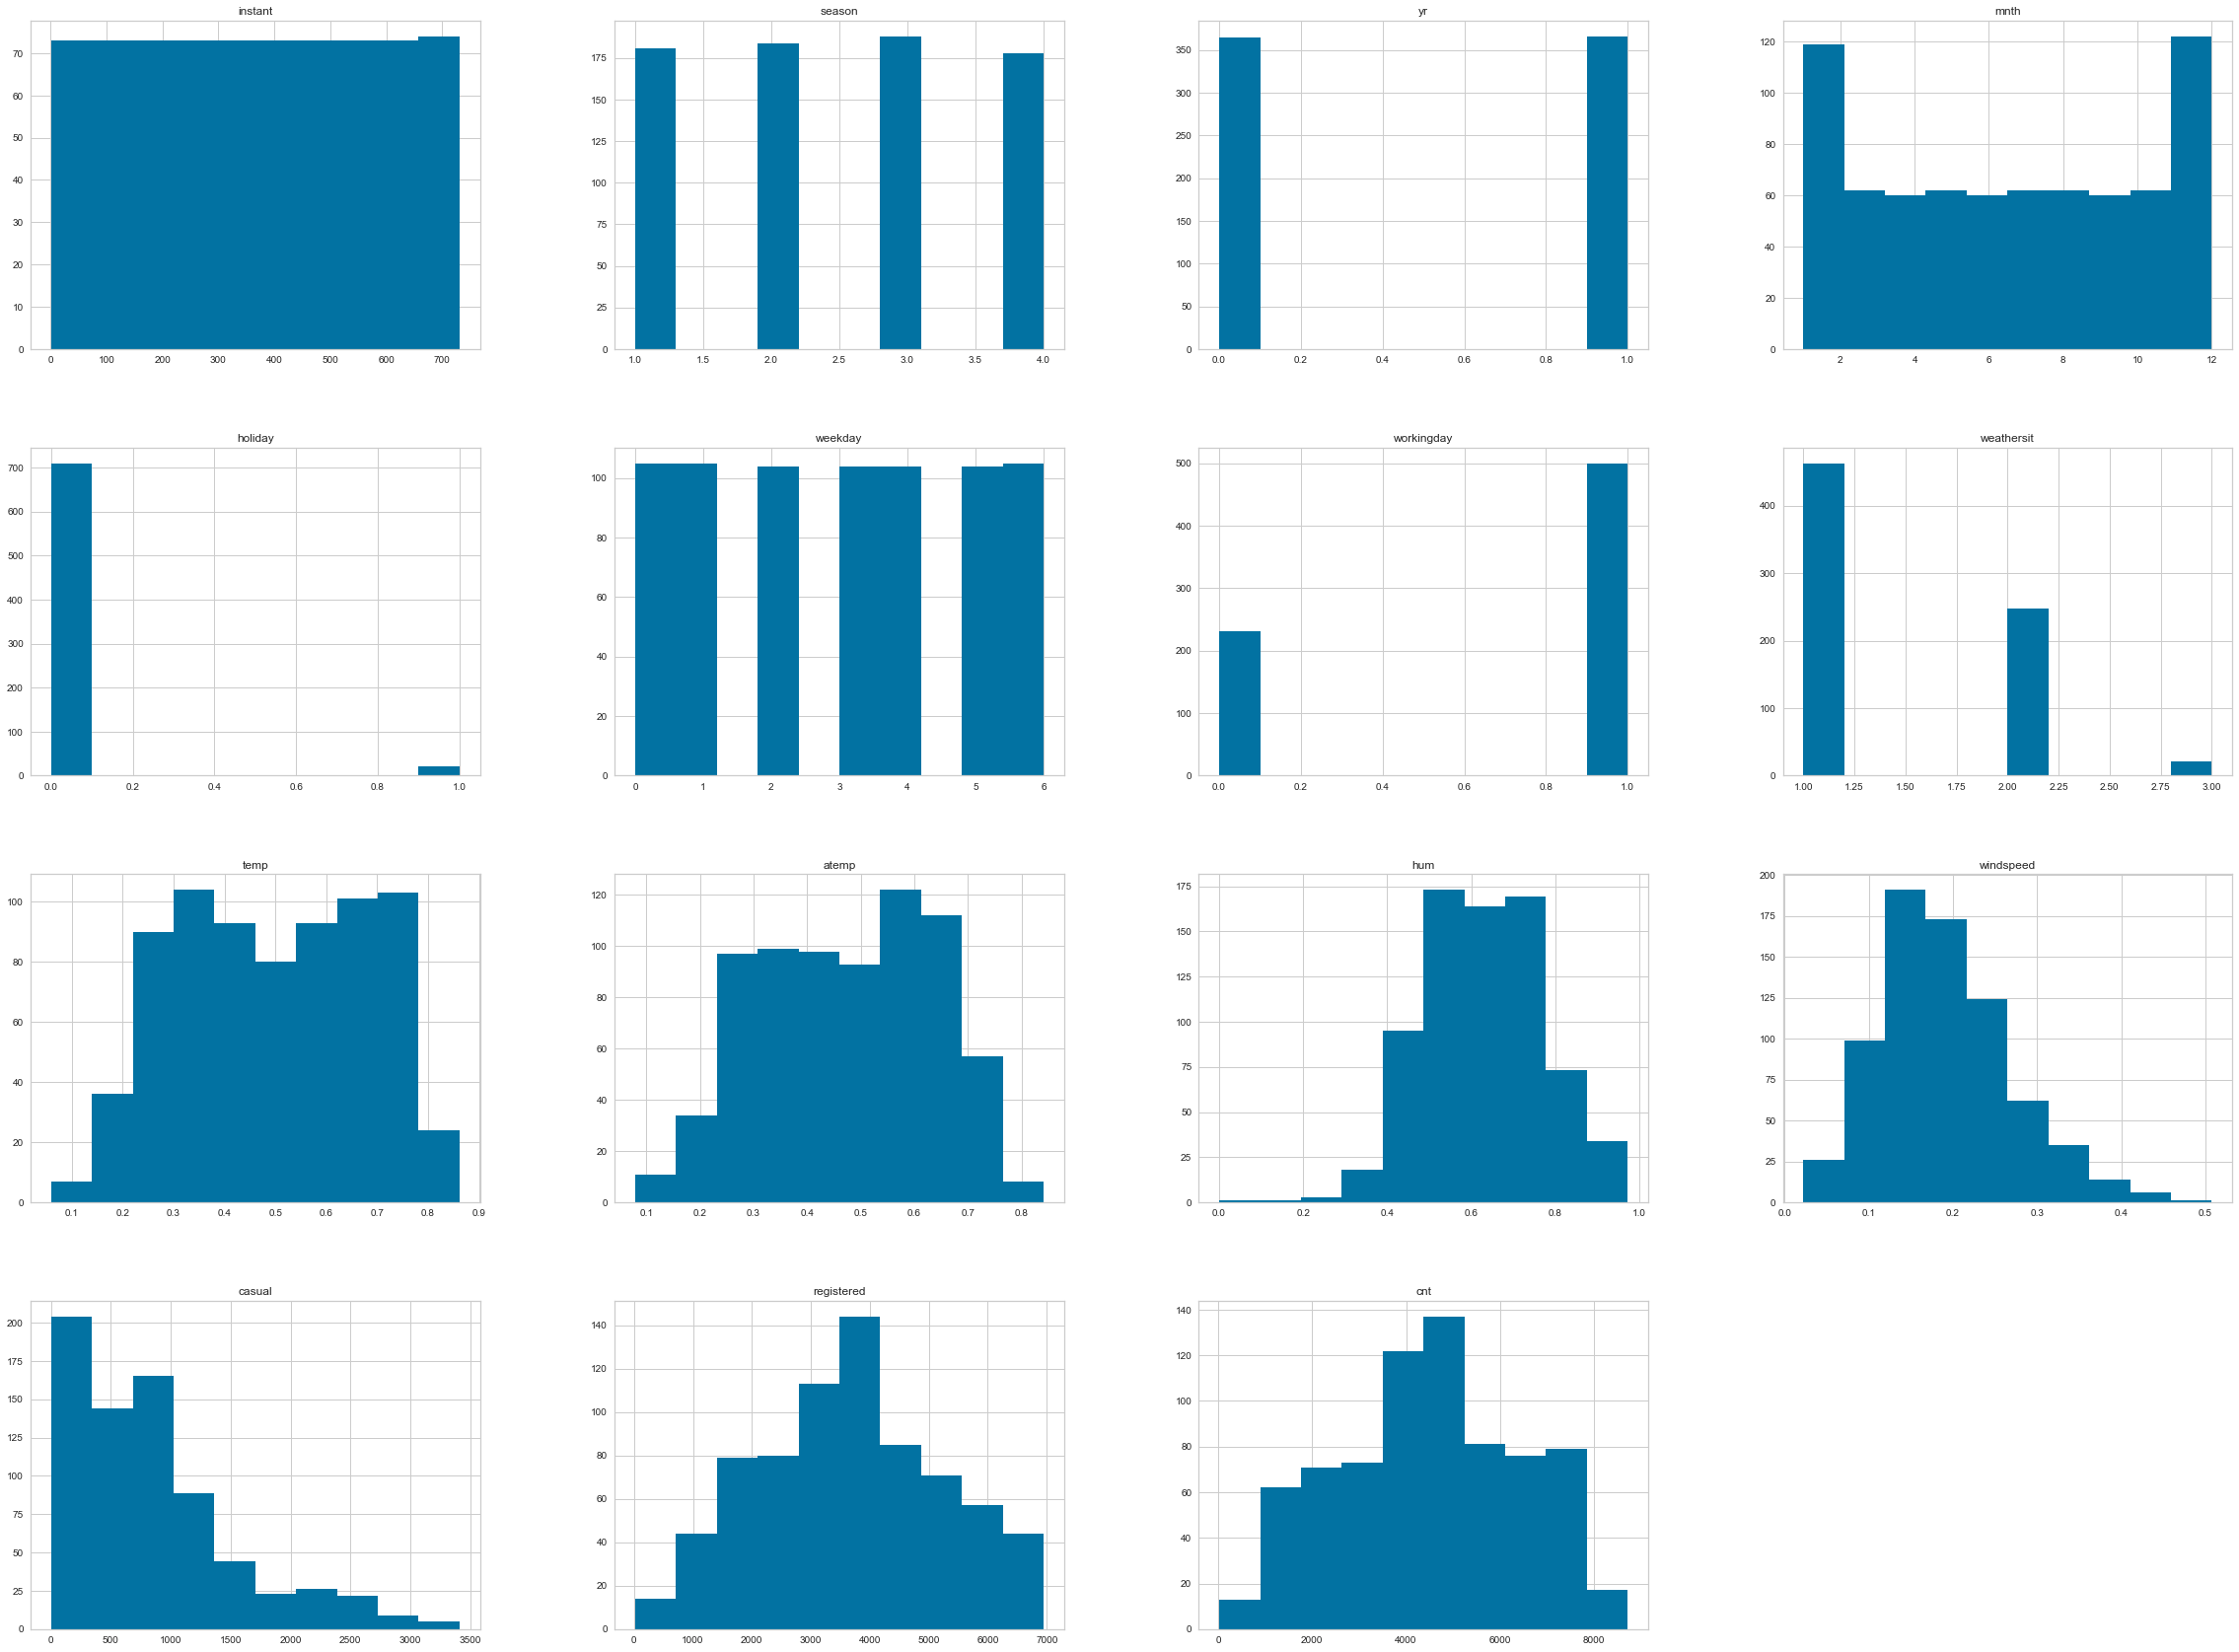

In [6]:
bicicletas_data.hist(figsize=(40,30));

#### Preprocesamiento y preparación de los datos antes de ajustar el modelo.

###### Eliminamos del conjunto de datos las variables que no són útiles para el problema o que no tiene sentido usar

Vemos que en el conjunto de datos no tenemos como ya hemos visto, datos faltantes, pero si que contamos con datos inecesarios. Procedamos a eliminar las variables innecesarias:

- Vemos que tenemos la variable **instant** que simplemente es un identificador
- También tenemos la variable **dteday** que no nos es relevante ya que podemos obtener su información a partir de otras del dataset
- Tambíen vemos que la suma de las variables de **casual** i **registered** nos da el conteo de bicicletas que justamente queremos predecir.

In [7]:
bicicletas_data.drop(columns=['instant' , 'dteday', 'casual', 'registered'], inplace=True) # ejemplo, me cargo year

In [9]:
bicicletas_data.describe(include='all').T

count         mean          std        min          25%  \
season      731.0     2.496580     1.110807   1.000000     2.000000   
yr          731.0     0.500684     0.500342   0.000000     0.000000   
mnth        731.0     6.519836     3.451913   1.000000     4.000000   
holiday     731.0     0.028728     0.167155   0.000000     0.000000   
weekday     731.0     2.997264     2.004787   0.000000     1.000000   
workingday  731.0     0.683995     0.465233   0.000000     0.000000   
weathersit  731.0     1.395349     0.544894   1.000000     1.000000   
temp        731.0     0.495385     0.183051   0.059130     0.337083   
atemp       731.0     0.474354     0.162961   0.079070     0.337842   
hum         731.0     0.627894     0.142429   0.000000     0.520000   
windspeed   731.0     0.190486     0.077498   0.022392     0.134950   
cnt         731.0  4504.348837  1937.211452  22.000000  3152.000000   

                    50%          75%          max  
season         3.000000     3.000000     4.000000  
yr             1.000000     1.000000     1.000000  
mnth           7.000000    10.000000    12.000000  
holiday        0.000000     0.000000     1.000000  
weekday        3.000000     5.000000     6.000000  
workingday     1.000000     1.000000     1.000000  
weathersit     1.000000     2.000000     3.000000  
temp           0.498333     0.655417     0.861667  
atemp          0.486733     0.608602     0.840896  
hum            0.626667     0.730209     0.972500  
windspeed      0.180975     0.233214     0.507463  
cnt         4548.000000  5956.000000  8714.000000

#### Con los histogramas podemos ver cierto comportamiento categórico en algunas variables del dataset

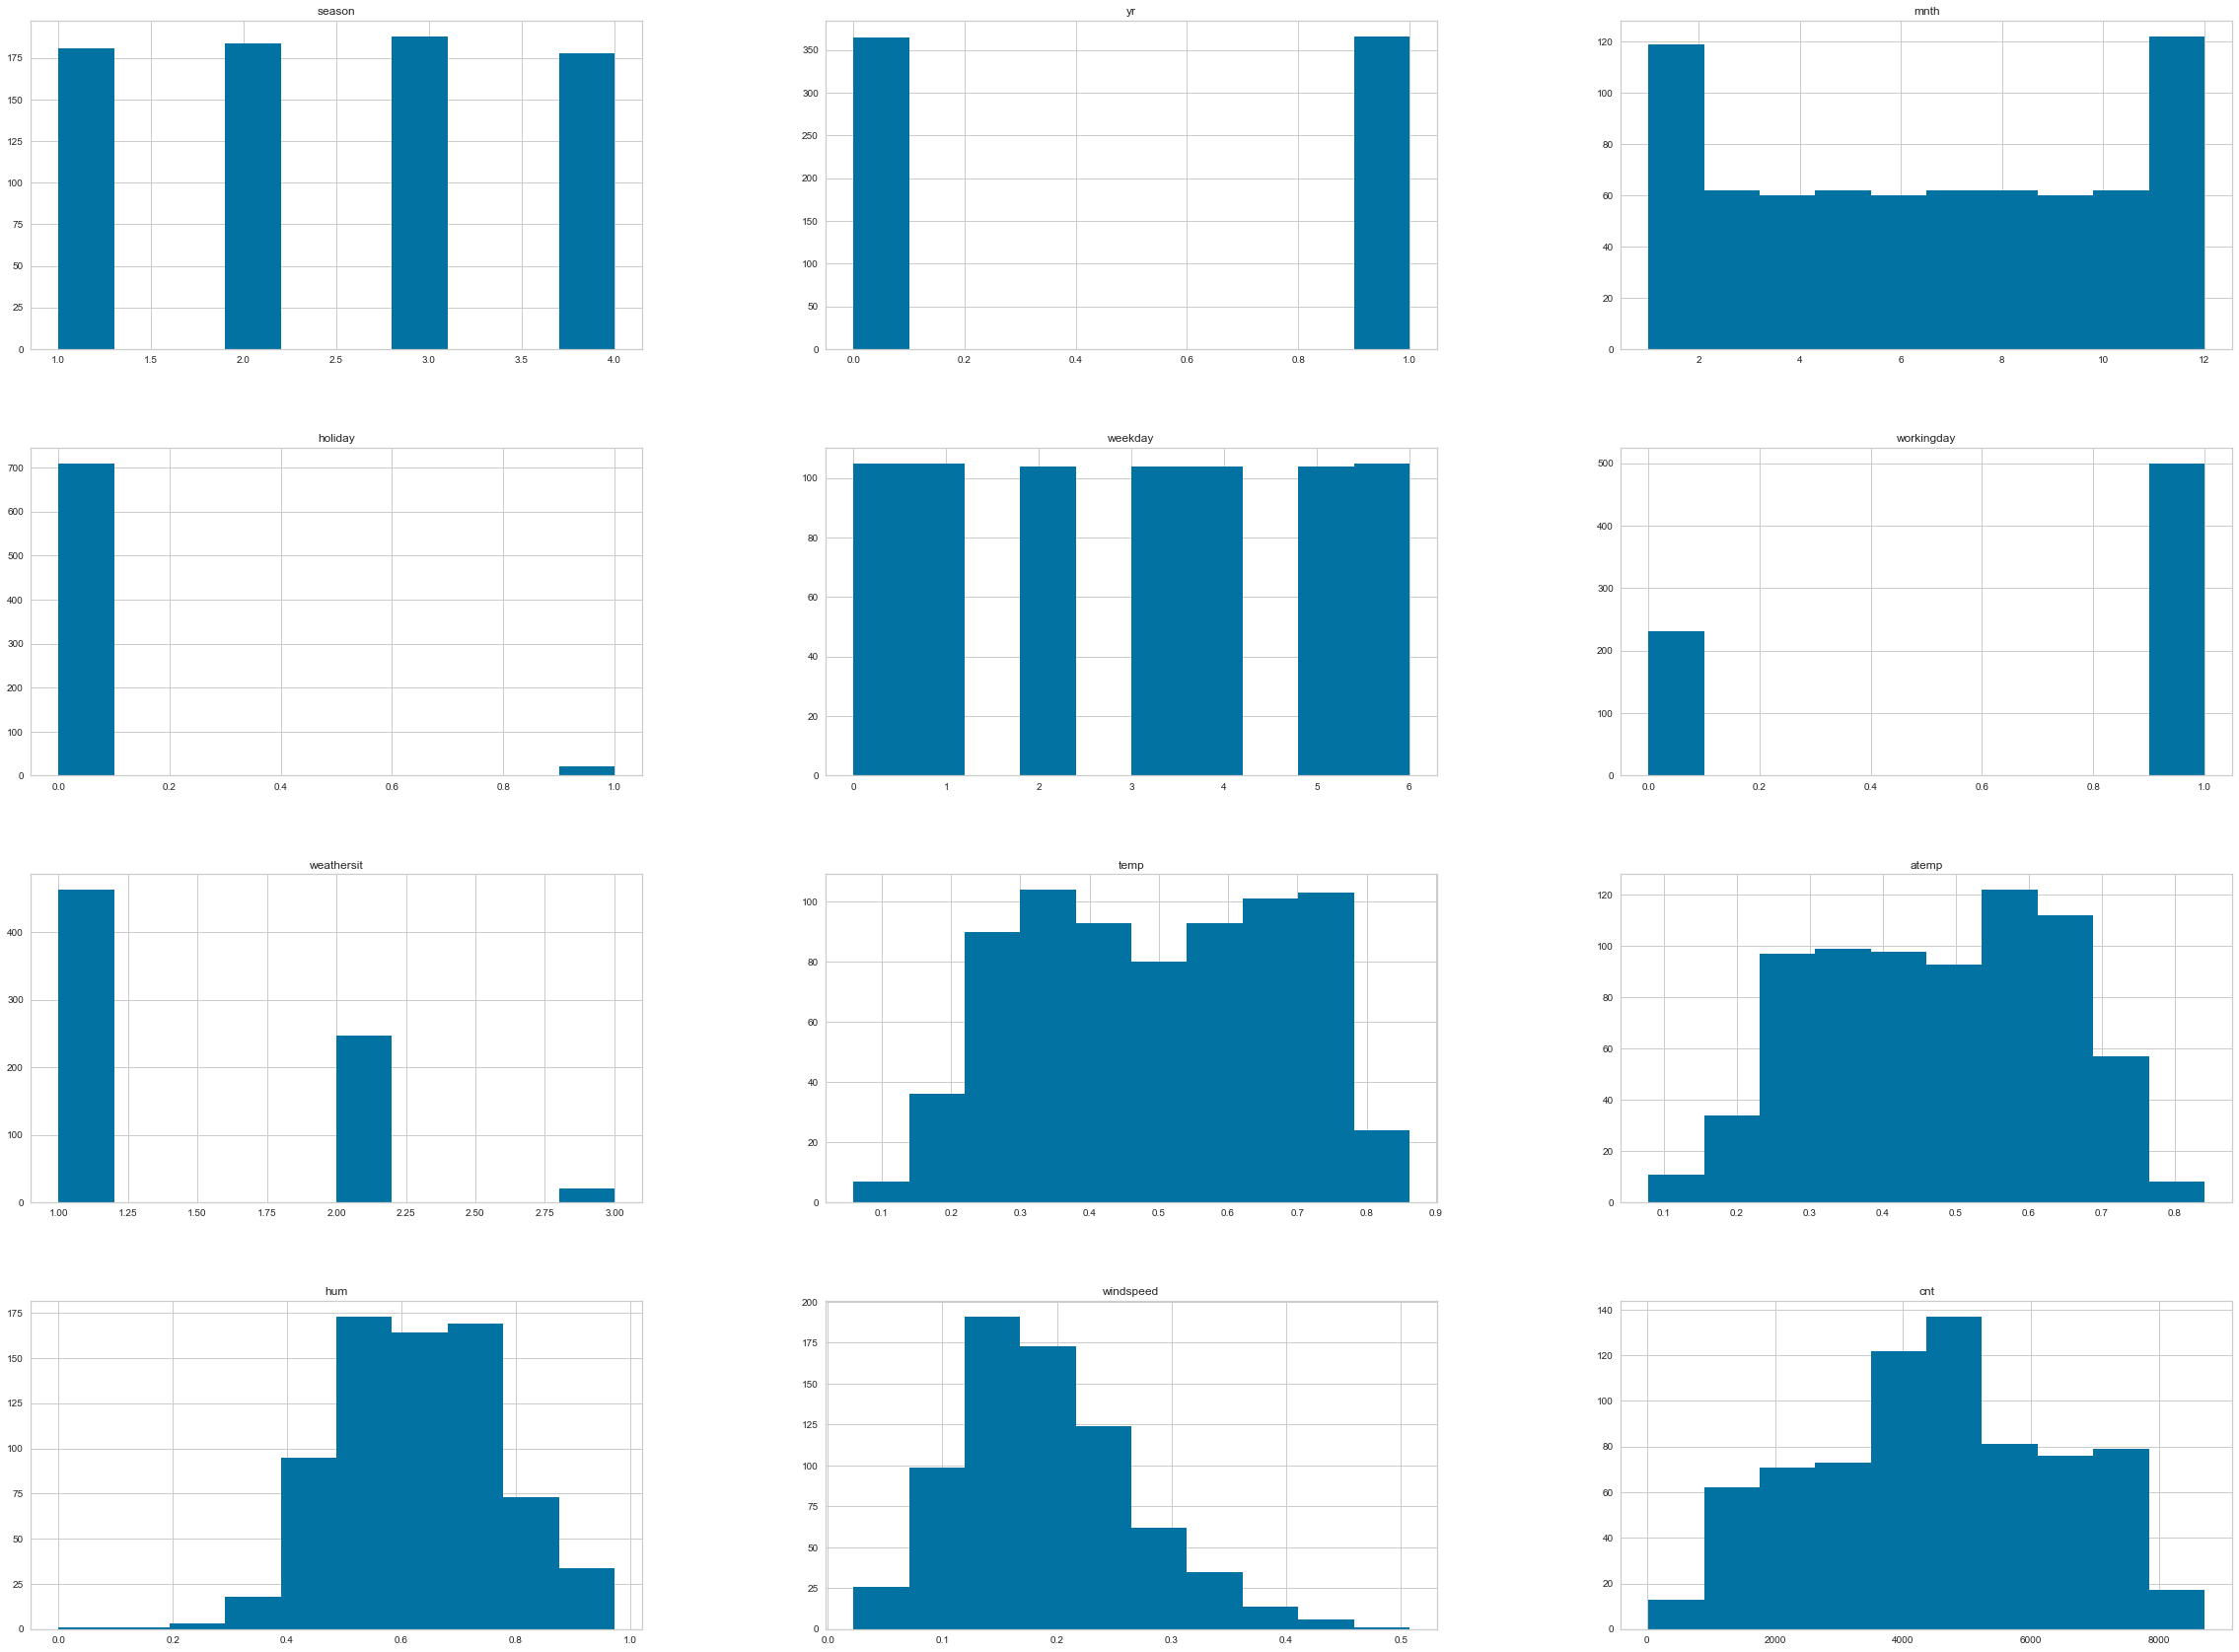

In [11]:
bicicletas_data.hist(figsize=(40,30));

##### Correlación entre las variables predictoras

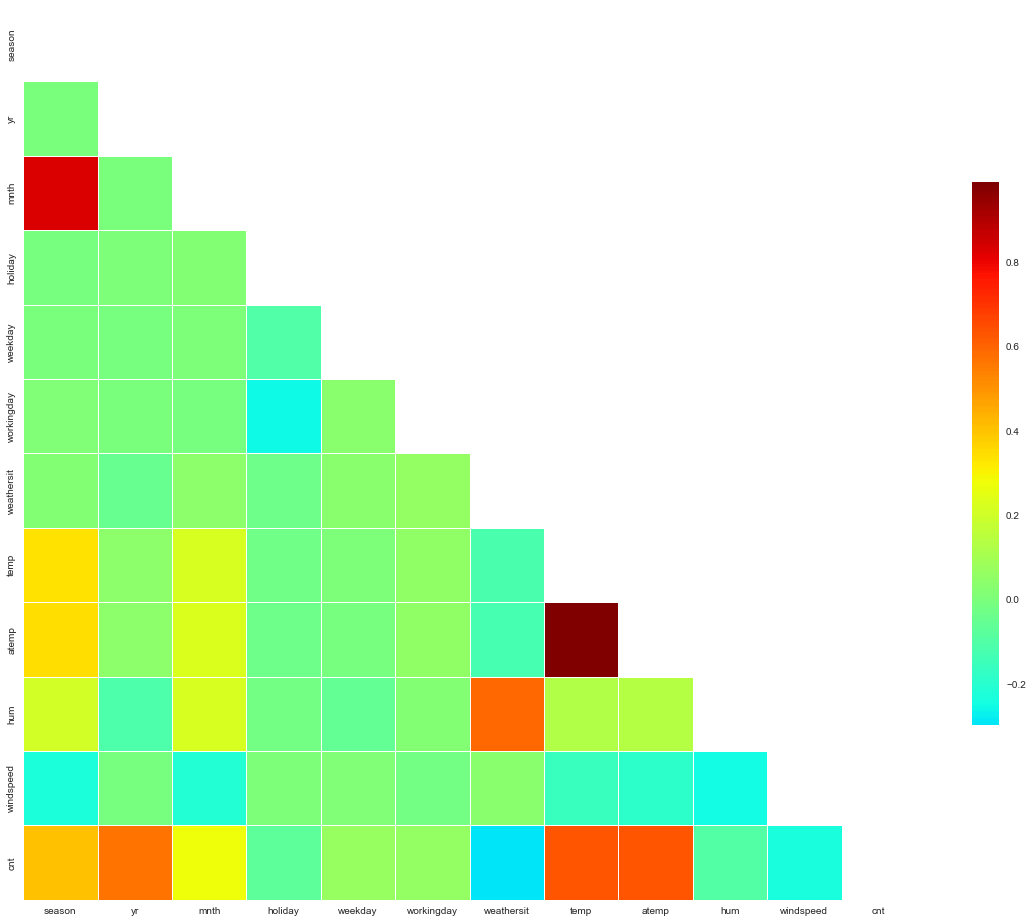

In [12]:
corr = bicicletas_data.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.subplots(figsize=(20, 20))
sns.heatmap(corr, mask=mask, cmap='jet',  center=0, square=True, linewidths=.8, cbar_kws={"shrink": .5});

##### Vemos que entre distintintas variables numéricas, estas toman valores categóricos, es por este motivo que aplicamos one-hot encoding para las variables que toman estos valores discretos en cada rango

In [13]:
bicicletas_data = pd.get_dummies(bicicletas_data, columns = ['yr','mnth','season','holiday','weekday','workingday','weathersit'], drop_first=False)

##### Correlación entre las distintas variables predictoras una vez aplicado el one-hot encoding

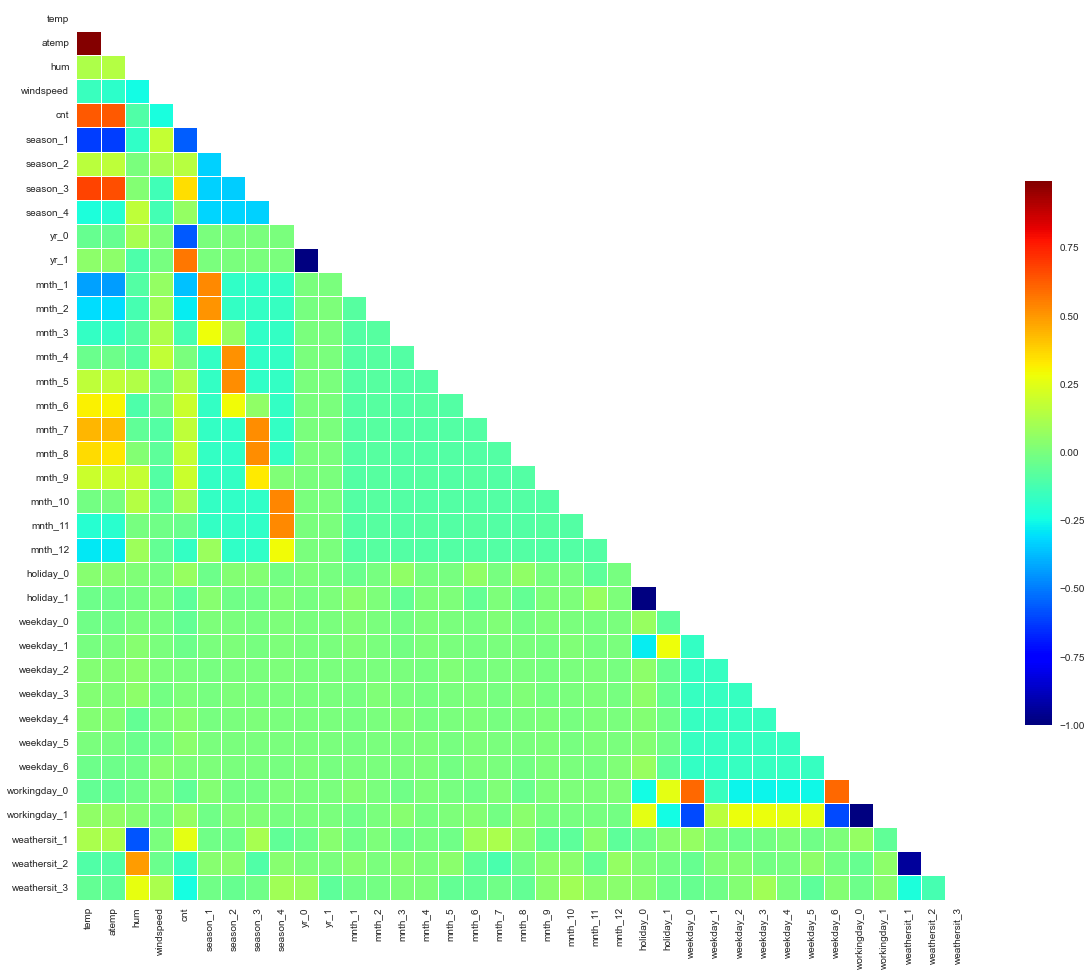

In [14]:
corr = bicicletas_data.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.subplots(figsize=(20, 20))
sns.heatmap(corr, mask=mask, cmap='jet',  center=0, square=True, linewidths=.8, cbar_kws={"shrink": .5});

Podemos ver que algunas variables muestra cierta relación con otras. Por ejemplo **atemp** y **temp** muestran un comportamiento muy marcado con **month** y con **season**. 

A su vez **temp** y **atemp** muestan un relación lineal entre ellas como es de esperar, así como también entre las variables month y season. Notamos que podemas observar la clasificación de los distintos mesos en cada época del año. Y la correspondencia de qué época correponde por cada mes del año.

También vemos un comportamiento tendencioso de **cnt** frente a las variables **weekday** y **mnth**. En la que se favorecen los valores 0 y 6 (probablemtne sabado y domingo) y en "mnth" hay un aumento de 0 a 6 - 7 para volver a disminuir entre 8 y 11.

##### Dividimos el conjunto de datos en entrenamiento y test

In [19]:
X = bicicletas_data.loc[:,bicicletas_data.columns != 'cnt']
y = bicicletas_data['cnt']

##### Transformamos las variables numéricas adecuadamente en un mismo rango para poder ajustar el modelo

In [20]:
 def scaling_preprocessing(X, y, scaler=None):
    print('Tamaño Original:{}'.format(X.shape))
    categorical_columns = X.dtypes[X.dtypes == 'object'].index.values
    
    # Escalamos las variables numericas
    numerical_columns = [c for c in X.columns if c not in categorical_columns]
    if scaler is None: 
        # Generamos el scaler cuando los datos son los de entrenamiento
        scaler = MinMaxScaler()
        X[numerical_columns] = scaler.fit_transform(X[numerical_columns])
    else: 
        X[numerical_columns] = scaler.transform(X[numerical_columns])
    return X, y, scaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
X_train, y_train, scaler = scaling_preprocessing(X_train,y_train)
X_test, y_test, _ = scaling_preprocessing(X_test,y_test,scaler)

Tamaño Original:(438, 36)
Tamaño Original:(293, 36)


##### Relación de la variable objetivo con todas las variables predictoras

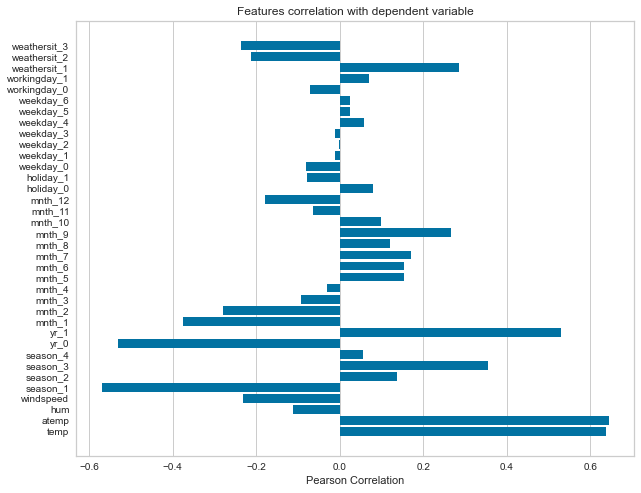

In [29]:
plt.figure(figsize=(10,8))
visualizer = feature_correlation(X_train, y_train, labels=list(X_train.columns),method='pearson');

##### A continunación compararemos y comentaremos un poco la dependencia lineal entre la característica objetivo contra las demás características.

Como bien sabemos, el coeficiente de correlación de Pearson puede abarcar un rango de -1 a 1. Y dos características tienen una correlación positiva perfecta si r = 1, ninguna correlación si r = 0 y una correlación negativa perfecta si r = -1. Como podemos ver en la lista anterior, o en los gráficos anteriores, podemos notar, lo siguente, por orden de correlación:

*CORRELACIÓN POSITIVA*

- Existe una correlación importante positiva evidente entre las variables **temp** i **atemp** contra la variable **cnt**.

- Exsiste una correlación positiva entre las variables **season1, season2, season3** contra la variable **cnt** ya que durante las épocas de primavera, verano y otoño, respectivamente se hará un uso mayor diario de bicicletas. 

- Esto también lo podemos extender a los meses que se incluyen en cada época del año, como vemos, los meses que pertenecen a una época en concreto de las tres vistas en el punto anterior, tendran una relación positiva con la variable count(**month5, month6, month7, month8, month9, month10**). Vemos que justamente hay meses de transición, como entre (otoño e invierno) y (invierno y primavera) donde la correlación baja con la variable count pasará a ser negativa, puesto que hará más frio y el uso de bicicletas será menor en el primer caso y en el segundo, cuando pasemos de invierno a primavera la correlació negativa será menor ya que cada vez usaremos más bicicletas diáriamente.

- También tenemos una correlación positiva segun el tiempo que nos da la variable **weather_sit1**

*CORRELACIÓN NEGATIVA*

- Existe una correlación importante negativa entre la variable **season0** i la variable **cnt**, esto es evidente ya que en el época de invierno debido al frio se usarán menos bicicletas.

- Esto se puede extender a los meses que pertencen a la época de invierno con los meses que transicionan la siguiente época del año(**month11, month12, month1, month2, month3, month4**)

- También tenemos una correlación negativa importante segun el tiempo que nos dan las variables **weather_sit2** y **weather_sit3**. Eso se extiende a las variables **hum** y **windspeed**, pues si hace peor tiempo, el conteo de bicicletad que se usarán en la ciudad y que computaremos será menor.

- Vemos que curiosamente si es domingo (**weekday0**), sabremos que se van a usar menos bicicletas puesto que la gente alomejor prefiere quedarse en casa.

*CORRELACIÓN PRÓXIMA A 0*

Observamos que no existe casi corerlación entre la variables que siguien y la variable objetivo:

- Vemos que dependiendo el dia de la semana afecta poco o casi nada al conteo de bicicletas. Si se trata de los días (**lunes, martes, miércoles, viernes, sábado**) (**weekday1, weekday2, weekday3, weekday5,weekday6**) apenas afecta sobre la variable count.

##### Vemos como se ha realizado el escalado de las variables

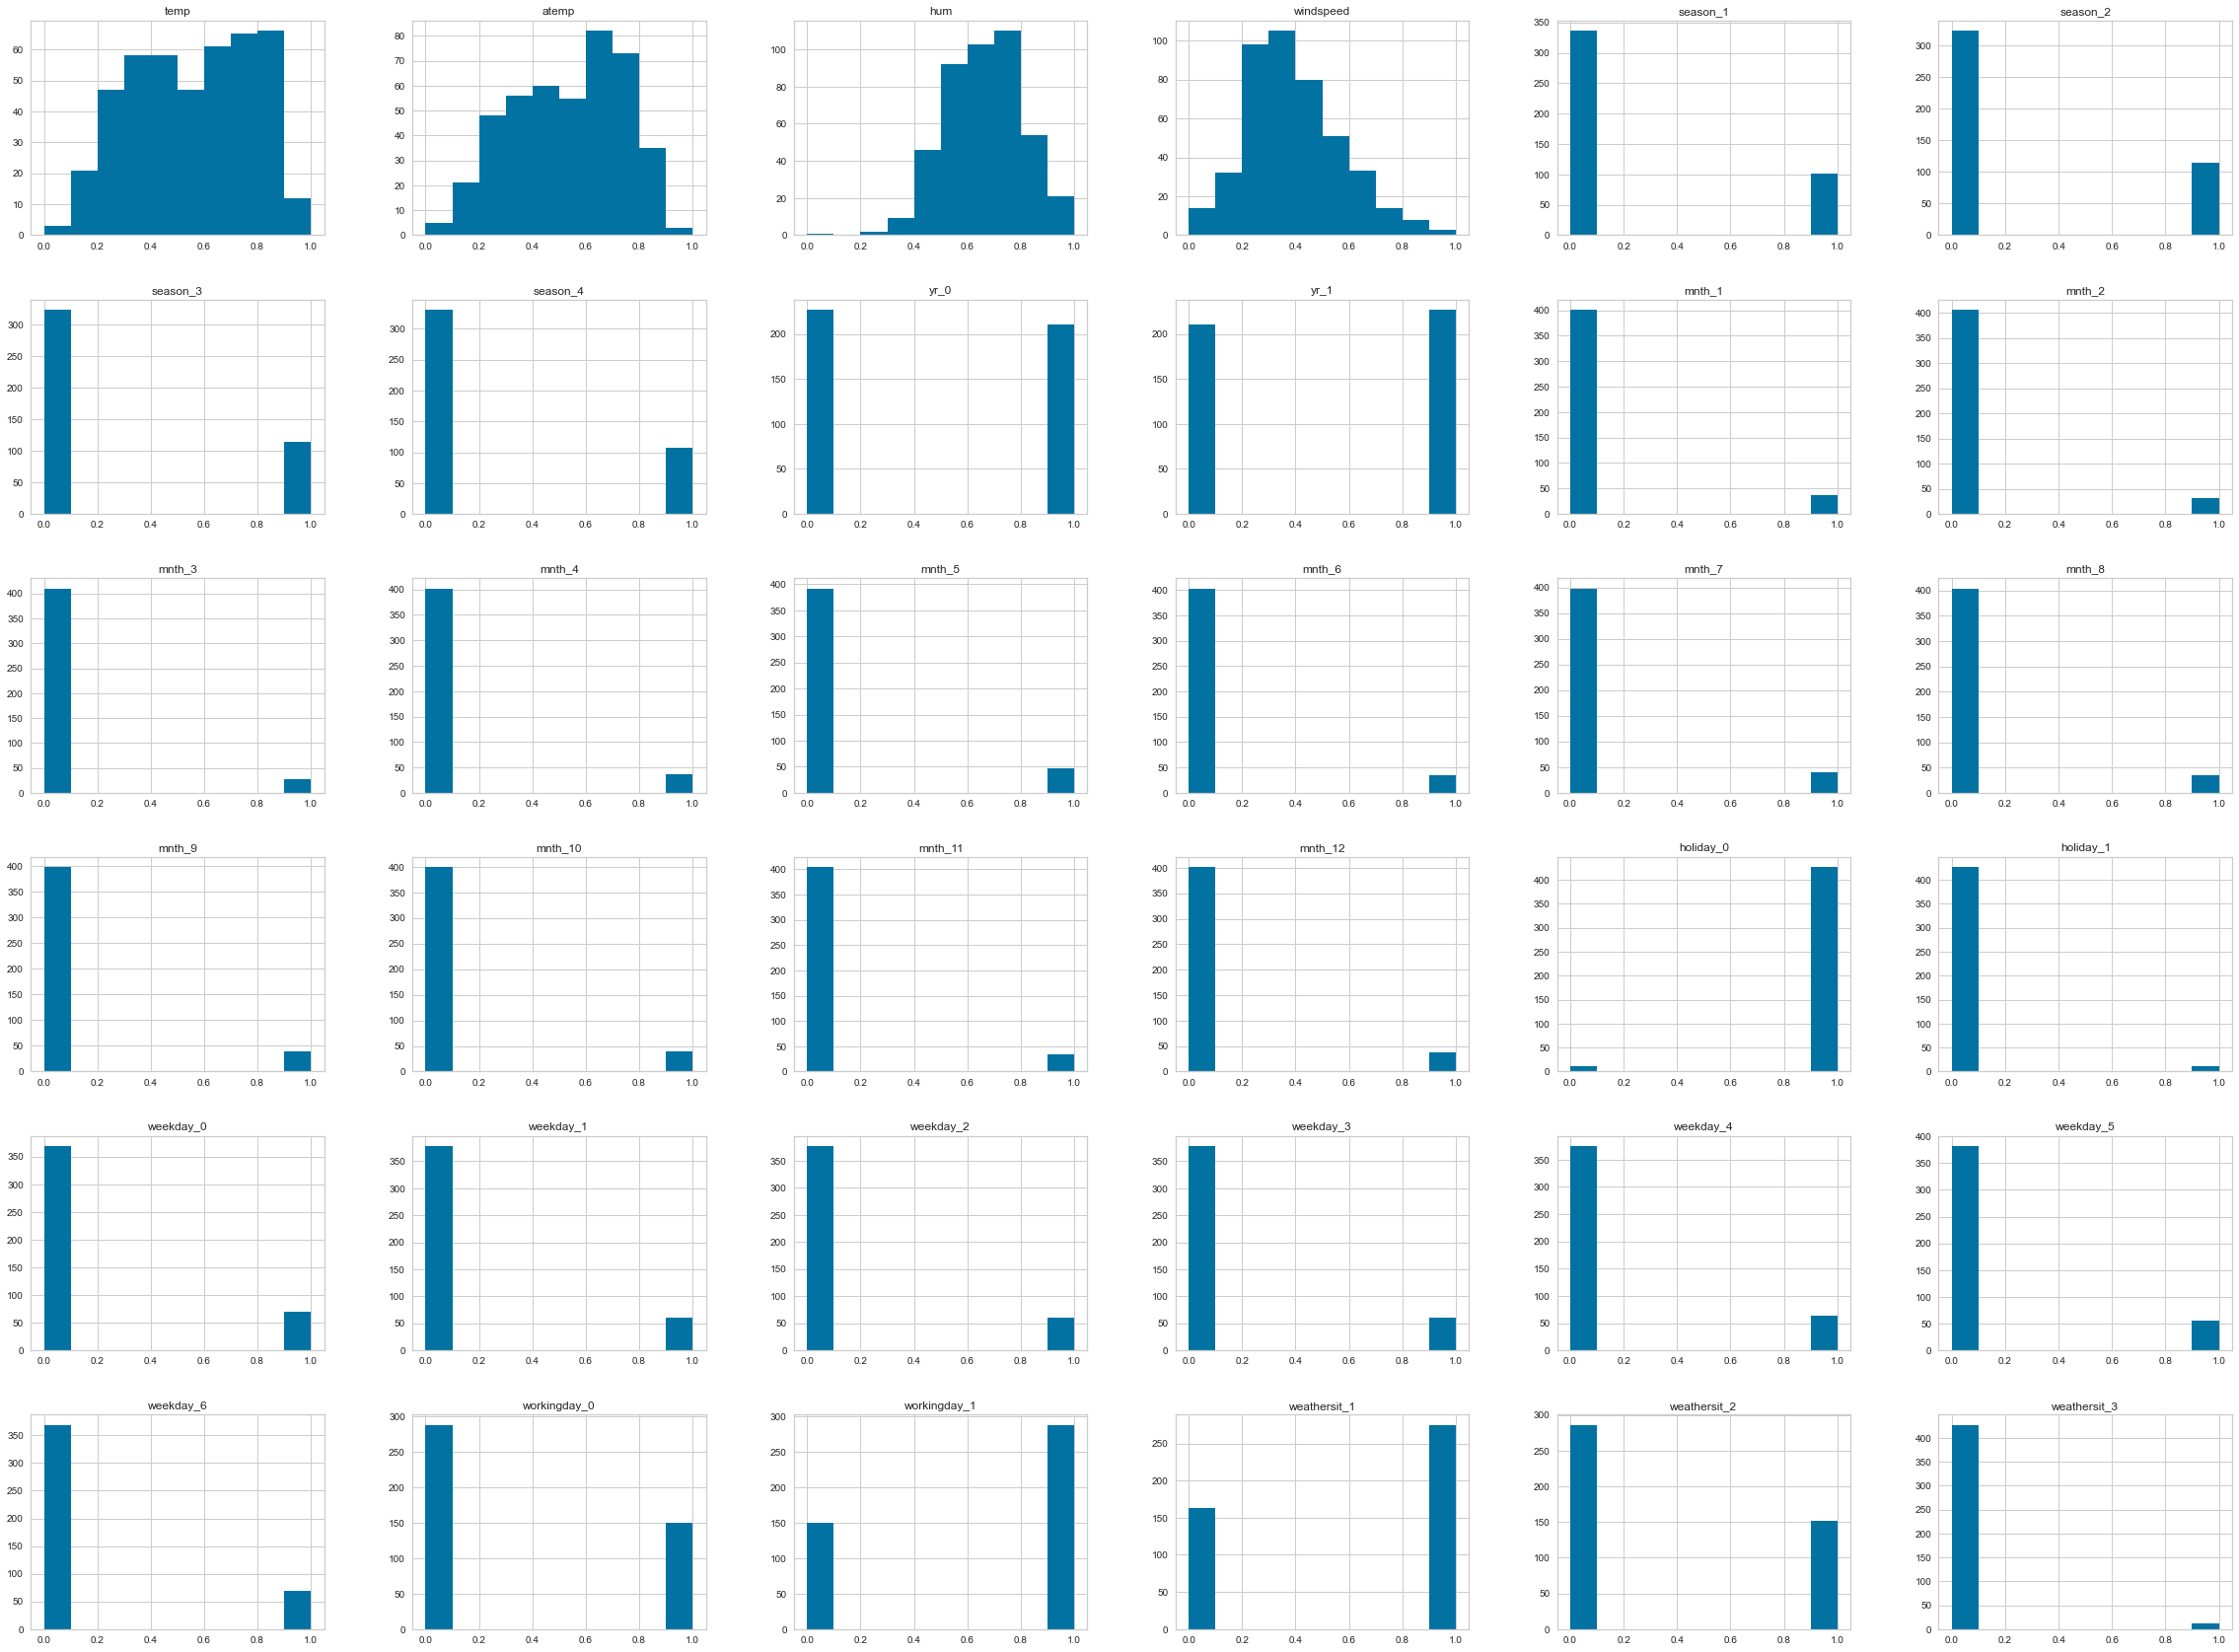

In [31]:
X_train.hist(figsize=(40,30));

### Probamos de ajustar un modelo lineal

In [34]:
lr = LinearRegression();
lr.fit(X_train,y_train);
y_pred = lr.predict(X_train);

weights = lr.coef_
intercept = lr.intercept_

print('Pesos: \n', weights[:])
print('Interceptor: \n', intercept)

Pesos: 
 [ 1.67940574e+01  4.28252773e+03 -1.36636162e+03 -8.39431390e+02
 -8.79857126e+02 -5.75496681e+00  1.04941715e+02  7.80670378e+02
 -9.79411422e+02  9.79411422e+02 -1.66702402e+02  2.14968570e+00
  3.86099792e+02  1.84217380e+02  3.89262738e+02  7.70355624e+01
 -4.99051300e+02 -1.97212653e+02  6.21387109e+02  6.32801328e+01
 -5.13089131e+02 -3.47376913e+02  2.66991842e+02 -2.66991842e+02
 -1.26511003e+02 -1.43873492e+02 -7.46313408e+01  6.44939180e+00
 -4.47509284e+01  8.84699941e+01  2.94847378e+02 -9.86554675e+01
  9.86554675e+01  8.04300435e+02  2.33922027e+02 -1.03822246e+03]
Interceptor: 
 2640.7999091361535


In [37]:
import statsmodels.api
model = sm.OLS(y_train, sm.add_constant(X_train))
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     81.00
Date:                Sun, 30 Oct 2022   Prob (F-statistic):          4.44e-148
Time:                        16:14:01   Log-Likelihood:                -3520.4
No. Observations:                 438   AIC:                             7099.
Df Residuals:                     409   BIC:                             7217.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          789.9167    109.008      7.246      0.000     575.631    1004.202
temp            16.7941   2377.175      0.007      0.994   -4656.212    4689.800
atemp         4282.5277   2422.186      1.768      0.078    -478.960    9044.015
hum          -1366.3616    358.760     -3.809      0.000   -2071.606    -661.117
windspeed     -839.4314    245.454     -3.420      0.001   -1321.940    -356.923
season_1      -682.3780    163.675     -4.169      0.000   -1004.126    -360.630
season_2       191.7242    167.210      1.147      0.252    -136.974     520.422
season_3       302.4209    162.583      1.860      0.064     -17.182     622.023
season_4       978.1495    159.014      6.151      0.000     665.563    1290.736
yr_0          -584.4531     67.602     -8.645      0.000    -717.345    -451.562
yr_1          1374.3698     65.333     21.036      0.000    1245.939    1502.800
mnth_1        -100.8760    234.589     -0.430      0.667    -562.026     360.274
mnth_2          67.9761    225.126      0.302      0.763    -374.573     510.525
mnth_3         451.9262    180.505      2.504      0.013      97.092     806.760
mnth_4         250.0438    208.913      1.197      0.232    -160.634     660.722
mnth_5         455.0891    212.963      2.137      0.033      36.451     873.728
mnth_6         142.8620    213.545      0.669      0.504    -276.920     562.644
mnth_7        -433.2249    232.847     -1.861      0.064    -890.952      24.502
mnth_8        -131.3863    229.076     -0.574      0.567    -581.699     318.926
mnth_9         687.2135    174.581      3.936      0.000     344.026    1030.401
mnth_10        129.1065    198.946      0.649      0.517    -261.977     520.190
mnth_11       -447.2627    219.120     -2.041      0.042    -878.005     -16.521
mnth_12       -281.5505    189.182     -1.488      0.137    -653.440      90.339
holiday_0      708.4159     98.644      7.182      0.000     514.503     902.329
holiday_1       81.5008    122.781      0.664      0.507    -159.861     322.862
weekday_0      -80.0453     78.197     -1.024      0.307    -233.763      73.672
weekday_1       -4.4764     95.264     -0.047      0.963    -191.745     182.792
weekday_2       64.7657     96.958      0.668      0.505    -125.832     255.363
weekday_3      145.8465     97.542      1.495      0.136     -45.900     337.593
weekday_4       94.6461     94.604      1.000      0.318     -91.324     280.616
weekday_5      227.8671     99.069      2.300      0.022      33.119     422.615
weekday_6      341.3131     77.658      4.395      0.000     188.655     493.971
workingday_0   342.7686     77.890      4.401      0.000     189.654     495.883
workingday_1   447.1481     54.416      8.217      0.000     340.179     554.117
weathersit_1  1067.6060     93.558     11.411      0.000     883.692    1251.520
weath

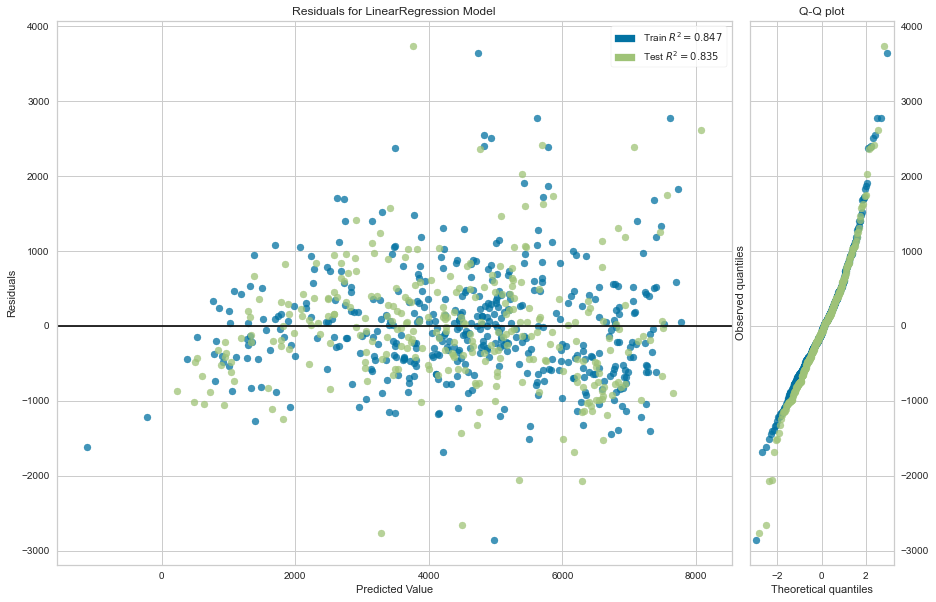

In [38]:
from yellowbrick.regressor import residuals_plot
plt.figure(figsize=(15,10));
viz = residuals_plot(lr, X_train, y_train, X_test, y_test, is_fitted=True, qqplot=True, hist=False);

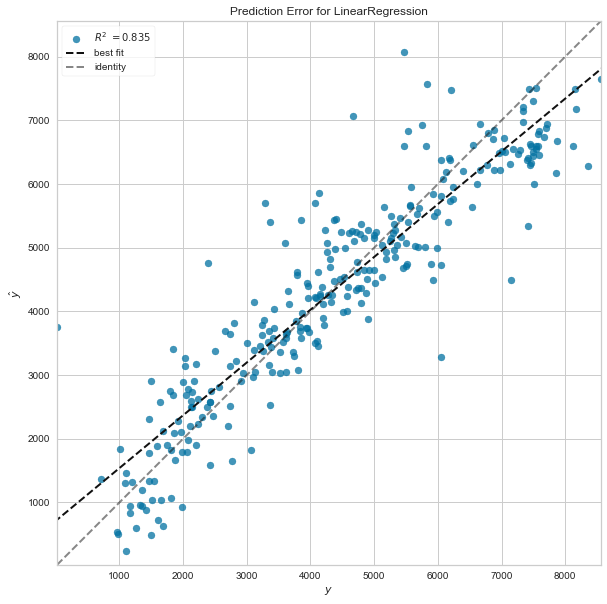

In [39]:
from yellowbrick.regressor import prediction_error

plt.figure(figsize=(15,10))
visualizer = prediction_error(lr, X_test, y_test, is_fitted=True)

#### Aplicamos Validación cruzada

In [44]:
cross_val_metrics = pd.DataFrame(columns=['MSE', 'norm_MSE', 'R2'])

#considerar canviar la varible del kf per 5, val no és viable
kf = KFold(n_splits=10)
i=1
for train_index, test_index in kf.split(X_train):
    print('Split {}: \n\tTest Folds: [{}] \n\tTrain Folds {}'.format(i, i, [j for j in range(1,11) if j != i]));
    
    x_train_fold = X_train.values[train_index]
    y_train_fold = y_train.values[train_index]
    x_test_fold = X_train.values[test_index,:]
    y_test_fold = y_train.values[test_index]
    
    lr = LinearRegression().fit(x_train_fold,y_train_fold)
    y_pred_fold = lr.predict(x_test_fold)
    fold_mse =mean_squared_error(y_test_fold, y_pred_fold)
    fold_nmse =  1-r2_score(y_test_fold, y_pred_fold)
    fold_r2 = r2_score(y_test_fold, y_pred_fold)
    print(f'\tMSE: {fold_mse:3.3f} NMSE: {fold_nmse:3.3f} R2: {fold_r2:3.3f}')

    cross_val_metrics.loc[f'Fold {i}', :] = [fold_mse,fold_nmse, fold_r2]
    i+=1

Split 1: 
	Test Folds: [1] 
	Train Folds [2, 3, 4, 5, 6, 7, 8, 9, 10]
	MSE: 652048.705 NMSE: 0.204 R2: 0.796
Split 2: 
	Test Folds: [2] 
	Train Folds [1, 3, 4, 5, 6, 7, 8, 9, 10]
	MSE: 588646.432 NMSE: 0.158 R2: 0.842
Split 3: 
	Test Folds: [3] 
	Train Folds [1, 2, 4, 5, 6, 7, 8, 9, 10]
	MSE: 704963.591 NMSE: 0.172 R2: 0.828
Split 4: 
	Test Folds: [4] 
	Train Folds [1, 2, 3, 5, 6, 7, 8, 9, 10]
	MSE: 855878.045 NMSE: 0.202 R2: 0.798
Split 5: 
	Test Folds: [5] 
	Train Folds [1, 2, 3, 4, 6, 7, 8, 9, 10]
	MSE: 703448.715 NMSE: 0.188 R2: 0.812
Split 6: 
	Test Folds: [6] 
	Train Folds [1, 2, 3, 4, 5, 7, 8, 9, 10]
	MSE: 752461.209 NMSE: 0.336 R2: 0.664
Split 7: 
	Test Folds: [7] 
	Train Folds [1, 2, 3, 4, 5, 6, 8, 9, 10]
	MSE: 906488.614 NMSE: 0.245 R2: 0.755
Split 8: 
	Test Folds: [8] 
	Train Folds [1, 2, 3, 4, 5, 6, 7, 9, 10]
	MSE: 649299.227 NMSE: 0.162 R2: 0.838
Split 9: 
	Test Folds: [9] 
	Train Folds [1, 2, 3, 4, 5, 6, 7, 8, 10]
	MSE: 548354.203 NMSE: 0.165 R2: 0.835
Split 10: 
	Test Fo

In [45]:
cross_val_metrics.loc['Mean',:] = cross_val_metrics.mean()
cross_val_metrics

MSE  norm_MSE        R2
Fold 1   652048.704545  0.203988  0.796012
Fold 2   588646.431818   0.15839   0.84161
Fold 3   704963.590909   0.17161   0.82839
Fold 4   855878.045455  0.201739  0.798261
Fold 5   703448.715269  0.188174  0.811826
Fold 6   752461.209294  0.336225  0.663775
Fold 7   906488.613636  0.244606  0.755394
Fold 8   649299.227273  0.162089  0.837911
Fold 9   548354.203211  0.164944  0.835056
Fold 10  422287.953488  0.121061  0.878939
Mean      678387.66949  0.195283  0.804717

In [46]:
lr = LinearRegression().fit(X_train,y_train);
folds_r2 = cross_val_score(lr, X_train,y_train, cv=10, scoring='r2')
lr_r2 = np.mean(folds_r2) 
folds_r2, lr_r2

(array([0.79986496, 0.85054582, 0.83607665, 0.77372701, 0.81177534,
        0.66331706, 0.75321349, 0.85266269, 0.83556662, 0.87661021]),
 0.8053359839334165)

In [47]:
r2_results = pd.DataFrame({'lr':lr_r2},index=['CV R2'])
valorLRr2 = lr_r2
r2_results.loc['Train R2', :] =[r2_score(y_train,lr.predict(X_train))]
r2_results.loc['lambda','lr']=0
r2_results

lr
CV R2     0.805336
Train R2  0.847215
lambda    0.000000

#### b) Aplicad algun método de reducción de dimensionalidad a los datos de entrenamiento y comentad lo que se pueda apreciar en la visualización. Pensad en qué podéis representar sobre la transformación.

Así pues este análisis de Componentes Princiaples(PCA) se basa en la matriz de covarianza de las variables. Por esta razón, si queremos que funcione de la mejor manera, debemos estandarizar los datos. Esto cambiará los datos para que todas las variables tengan media 0 y desviación estándar 1.

Con esta nueva representación queremos encuentrar las dimensiones linealmente independientes que puedan representar sin pérdidas el conjunto de de datos. Estas dimensiones recién encontradas nos deberían permitir predecir/reconstruir las dimensiones originales. Así pues, si minimizamos el error de reconstrucción/proyección de los datos, nuestra varianza augmentará.

In [48]:
X_train_standarized = X_train.copy()
scaler = StandardScaler()
X_train_standarized[X_train.columns] = scaler.fit_transform(X_train[X_train.columns])
X_train_standarized.describe().T

count          mean       std       min       25%       50%  \
temp          438.0 -1.001229e-16  1.001144 -2.480716 -0.869992  0.108509   
atemp         438.0  1.926414e-17  1.001144 -2.531515 -0.801925  0.172512   
hum           438.0  8.714490e-16  1.001144 -4.569408 -0.735420  0.043630   
windspeed     438.0 -5.424377e-17  1.001144 -2.251317 -0.719737 -0.161272   
season_1      438.0  8.288651e-17  1.001144 -0.550973 -0.550973 -0.550973   
season_2      438.0 -1.916275e-16  1.001144 -0.596688 -0.596688 -0.596688   
season_3      438.0  1.825024e-17  1.001144 -0.593171 -0.593171 -0.593171   
season_4      438.0  1.257239e-16  1.001144 -0.568562 -0.568562 -0.568562   
yr_0          438.0 -1.054458e-16  1.001144 -0.964114 -0.964114 -0.964114   
yr_1          438.0  1.054458e-16  1.001144 -1.037222 -1.037222  0.964114   
mnth_1        438.0  2.291419e-16  1.001144 -0.303759 -0.303759 -0.303759   
mnth_2        438.0  1.191335e-17  1.001144 -0.280745 -0.280745 -0.280745   
mnth_3        438.0  1.898532e-16  1.001144 -0.261329 -0.261329 -0.261329   
mnth_4        438.0  2.007527e-16  1.001144 -0.299253 -0.299253 -0.299253   
mnth_5        438.0  1.196405e-16  1.001144 -0.342559 -0.342559 -0.342559   
mnth_6        438.0  1.934019e-16  1.001144 -0.294701 -0.294701 -0.294701   
mnth_7        438.0 -2.179890e-16  1.001144 -0.317021 -0.317021 -0.317021   
mnth_8        438.0 -3.219140e-17  1.001144 -0.290101 -0.290101 -0.290101   
mnth_9        438.0  4.917426e-17  1.001144 -0.317021 -0.317021 -0.317021   
mnth_10       438.0 -4.156999e-17  1.001144 -0.312641 -0.312641 -0.312641   
mnth_11       438.0 -9.403944e-17  1.001144 -0.290101 -0.290101 -0.290101   
mnth_12       438.0  2.504339e-16  1.001144 -0.303759 -0.303759 -0.303759   
holiday_0     438.0  7.946459e-17  1.001144 -5.958188  0.167836  0.167836   
holiday_1     438.0 -7.946459e-17  1.001144 -0.167836 -0.167836 -0.167836   
weekday_0     438.0  3.375027e-16  1.001144 -0.432426 -0.432426 -0.432426   
weekday_1     438.0  1.787003e-16  1.001144 -0.398410 -0.398410 -0.398410   
weekday_2     438.0  8.846298e-17  1.001144 -0.402248 -0.402248 -0.402248   
weekday_3     438.0 -2.250863e-16  1.001144 -0.398410 -0.398410 -0.398410   
weekday_4     438.0 -5.804591e-17  1.001144 -0.409878 -0.409878 -0.409878   
weekday_5     438.0 -3.269835e-17  1.001144 -0.382880 -0.382880 -0.382880   
weekday_6     438.0  2.932712e-16  1.001144 -0.432426 -0.432426 -0.432426   
workingday_0  438.0 -3.852829e-17  1.001144 -0.721688 -0.721688 -0.721688   
workingday_1  438.0  4.106304e-17  1.001144 -1.385641 -1.385641  0.721688   
weathersit_1  438.0  9.277206e-17  1.001144 -1.298891 -1.298891  0.769888   
weathersit_2  438.0  2.073430e-16  1.001144 -0.729019 -0.729019 -0.729019   
weathersit_3  438.0  5.627158e-17  1.001144 -0.160503 -0.160503 -0.160503   

                   75%       max  
temp          0.863638  1.987637  
atemp         0.807409  2.233770  
hum           0.702780  2.332221  
windspeed     0.583358  3.452140  
season_1     -0.550973  1.814970  
season_2      1.675916  1.675916  
season_3      1.685854  1.685854  
season_4     -0.568562  1.758823  
yr_0          1.037222  1.037222  
yr_1          0.964114  0.964114  
mnth_1       -0.303759  3.292087  
mnth_2       -0.280745  3.561952  
mnth_3       -0.261329  3.826599  
mnth_4       -0.299253  3.341656  
mnth_5       -0.342559  2.919202  
mnth_6       -0.294701  3.393271  
mnth_7       -0.317021  3.154362  
mnth_8       -0.290101  3.447079  
mnth_9       -0.317021  3.154362  
mnth_10      -0.312641  3.198557  
mnth_11      -0.290101  3.447079  
mnth_12      -0.303759  3.292087  
holiday_0     0.167836  0.167836  
holiday_1    -0.167836  5.958188  
weekday_0    -0.432426  2.312537  
weekday_1    -0.398410  2.509980  
weekday_2    -0.402248  2.486027  
weekday_3    -0.398410  2.509980  
weekday_4    -0.409878  2.439750  
weekday_5    -0.382880  2.611786  
weekday_6    -0.432426  2.312537  
workingday_0  1.385641  1.385641  
workingda

In [49]:
X_test_standarized = X_test.copy()
X_test_standarized[X_test.columns] = scaler.transform(X_test[X_test.columns])
X_test_standarized.describe().T

count      mean       std       min       25%       50%  \
temp          293.0 -0.129097  1.042519 -2.272529 -1.032888 -0.211639   
atemp         293.0 -0.147146  1.041438 -2.407855 -1.031907 -0.167167   
hum           293.0 -0.167353  1.044390 -3.221945 -0.954267 -0.243194   
windspeed     293.0  0.089472  1.129151 -1.912742 -0.719792 -0.042868   
season_1      293.0  0.086943  1.051719 -0.550973 -0.550973 -0.550973   
season_2      293.0 -0.061502  0.965934 -0.596688 -0.596688 -0.596688   
season_3      293.0 -0.017581  0.991886 -0.593171 -0.593171 -0.593171   
season_4      293.0 -0.004588  0.998961 -0.568562 -0.568562 -0.568562   
yr_0          293.0  0.087783  1.001065 -0.964114 -0.964114  1.037222   
yr_1          293.0 -0.087783  1.001065 -1.037222 -1.037222 -1.037222   
mnth_1        293.0  0.003054  1.006267 -0.303759 -0.303759 -0.303759   
mnth_2        293.0  0.047130  1.075346 -0.280745 -0.280745 -0.280745   
mnth_3        293.0  0.213038  1.311497 -0.261329 -0.261329 -0.261329   
mnth_4        293.0 -0.001021  1.000153 -0.299253 -0.299253 -0.299253   
mnth_5        293.0 -0.164443  0.742381 -0.342559 -0.342559 -0.342559   
mnth_6        293.0  0.019972  1.032048 -0.294701 -0.294701 -0.294701   
mnth_7        293.0 -0.056371  0.916375 -0.317021 -0.317021 -0.317021   
mnth_8        293.0  0.067036  1.100578 -0.290101 -0.290101 -0.290101   
mnth_9        293.0 -0.080067  0.876948 -0.317021 -0.317021 -0.317021   
mnth_10       293.0 -0.037018  0.945967 -0.312641 -0.312641 -0.312641   
mnth_11       293.0  0.041526  1.064538 -0.290101 -0.290101 -0.290101   
mnth_12       293.0  0.003054  1.006267 -0.303759 -0.303759 -0.303759   
holiday_0     293.0 -0.020335  1.058849 -5.958188  0.167836  0.167836   
holiday_1     293.0  0.020335  1.058849 -0.167836 -0.167836 -0.167836   
weekday_0     293.0 -0.095161  0.902670 -0.432426 -0.432426 -0.432426   
weekday_1     293.0  0.048271  1.050411 -0.398410 -0.398410 -0.398410   
weekday_2     293.0  0.021628  1.023806 -0.402248 -0.402248 -0.402248   
weekday_3     293.0  0.038345  1.040767 -0.398410 -0.398410 -0.398410   
weekday_4     293.0 -0.011125  0.990274 -0.409878 -0.409878 -0.409878   
weekday_5     293.0  0.107714  1.110265 -0.382880 -0.382880 -0.382880   
weekday_6     293.0 -0.095161  0.902670 -0.432426 -0.432426 -0.432426   
workingday_0  293.0 -0.139116  0.944099 -0.721688 -0.721688 -0.721688   
workingday_1  293.0  0.139116  0.944099 -1.385641 -1.385641  0.721688   
weathersit_1  293.0  0.028517  0.993716 -1.298891 -1.298891  0.769888   
weathersit_2  293.0 -0.047896  0.985005 -0.729019 -0.729019 -0.729019   
weathersit_3  293.0  0.057618  1.162336 -0.160503 -0.160503 -0.160503   

                   75%       max  
temp          0.777651  1.918039  
atemp         0.729342  2.004778  
hum           0.566480  2.403926  
windspeed     0.659514  4.348809  
season_1      1.814970  1.814970  
season_2     -0.596688  1.675916  
season_3      1.685854  1.685854  
season_4     -0.568562  1.758823  
yr_0          1.037222  1.037222  
yr_1          0.964114  0.964114  
mnth_1       -0.303759  3.292087  
mnth_2       -0.280745  3.561952  
mnth_3       -0.261329  3.826599  
mnth_4       -0.299253  3.341656  
mnth_5       -0.342559  2.919202  
mnth_6       -0.294701  3.393271  
mnth_7       -0.317021  3.154362  
mnth_8       -0.290101  3.447079  
mnth_9       -0.317021  3.154362  
mnth_10      -0.312641  3.198557  
mnth_11      -0.290101  3.447079  
mnth_12      -0.303759  3.292087  
holiday_0     0.167836  0.167836  
holiday_1    -0.167836  5.958188  
weekday_0    -0.432426  2.312537  
weekday_1    -0.398410  2.509980  
weekday_2    -0.402248  2.486027  
weekday_3    -0.398410  2.509980  
weekday_4    -0.409878  2.439750  
weekday_5    -0.382880  2.611786  
weekday_6    -0.432426  2.312537  
workingday_0  1.385641  1.385641  
workingday_1  0.721688  0.721688  
weathersit_1  0.769888  0.769888  
weathersit_2  1.371707  1.371707  
weathersit_3 -0.160503  6.230424

#### Como se verian las variables sin realizar el PCA... y la poca información que podemos sacar de nuestro conjunto de datos

<AxesSubplot:xlabel='hum', ylabel='windspeed'>

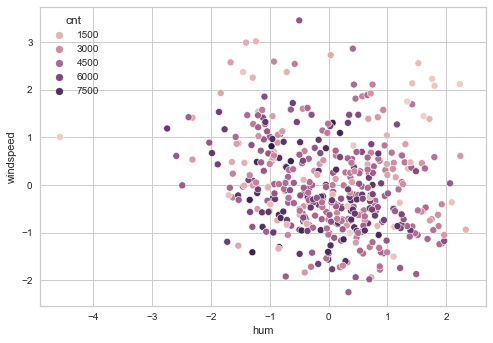

In [51]:
sns.scatterplot(x=X_train_standarized.iloc[:,2], y=X_train_standarized.iloc[:,3], hue=y_train)

<AxesSubplot:xlabel='atemp', ylabel='season_3'>

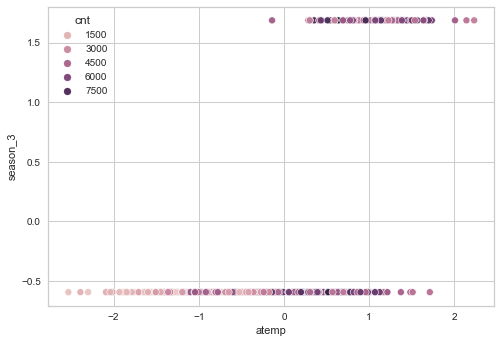

In [55]:
sns.scatterplot(x=X_train_standarized.iloc[:,1], y=X_train_standarized.iloc[:,6], hue=y_train)

In [56]:
myPCA = PCA().fit(X_train_standarized[X_train.columns]);

#PCA.explained_variance_ratio_ para comprender qué porcentaje de varianza explican los datos
print(myPCA.explained_variance_ratio_)
print(myPCA.explained_variance_ratio_.cumsum())

[1.19431509e-01 8.74839136e-02 7.18473295e-02 6.76987799e-02
 6.21963093e-02 5.84009302e-02 5.46205185e-02 3.75759443e-02
 3.58801736e-02 3.42668965e-02 3.34790480e-02 3.22551785e-02
 3.08813895e-02 3.02838566e-02 3.00964750e-02 2.94155313e-02
 2.90389308e-02 2.81365771e-02 2.76179132e-02 2.61817161e-02
 2.44487295e-02 2.27262236e-02 1.13862184e-02 5.56224772e-03
 4.80432455e-03 2.47228945e-03 1.74029654e-03 7.07497699e-05
 2.35537120e-32 4.93638242e-33 1.23183823e-33 1.03657473e-33
 1.00282589e-33 9.22596169e-34 8.12617208e-34 3.49741165e-34]
[0.11943151 0.20691542 0.27876275 0.34646153 0.40865784 0.46705877
 0.52167929 0.55925523 0.59513541 0.6294023  0.66288135 0.69513653
 0.72601792 0.75630178 0.78639825 0.81581378 0.84485271 0.87298929
 0.9006072  0.92678892 0.95123765 0.97396387 0.98535009 0.99091234
 0.99571666 0.99818895 0.99992925 1.         1.         1.
 1.         1.         1.         1.         1.         1.        ]


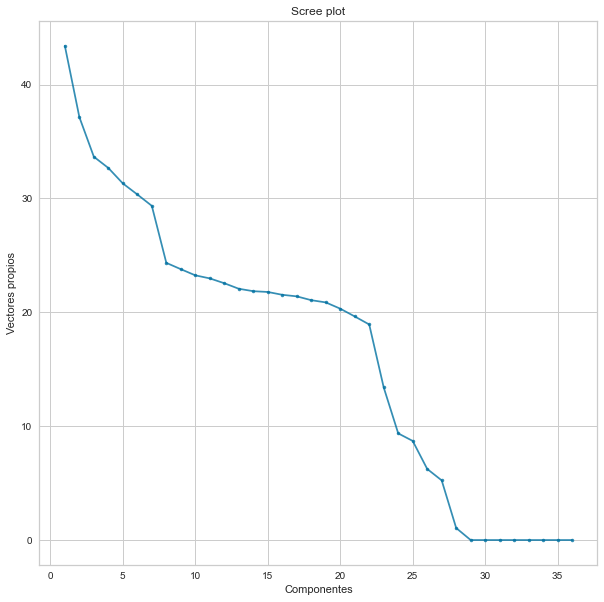

In [57]:
fig = plt.figure(figsize=(10,10));
plt.plot(range(1,len(myPCA.singular_values_ )+1),myPCA.singular_values_ ,alpha=0.8,marker='.');
#La nueva base son los vectores propios de la matriz de covarianza.
y_label = plt.ylabel('Vectores propios');
x_label = plt.xlabel('Componentes');
plt.title('Scree plot');

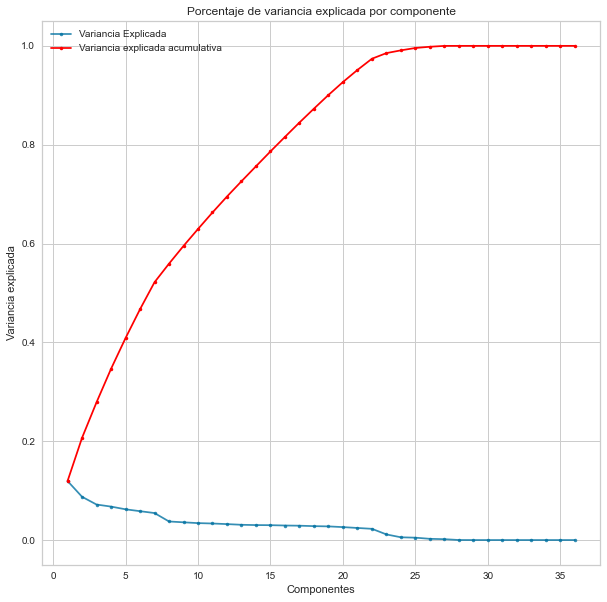

In [58]:
fig = plt.figure(figsize=(10,10));
plt.plot(range(1,len(myPCA.explained_variance_ratio_ )+1),myPCA.explained_variance_ratio_ ,alpha=0.8,marker='.',label="Variancia Explicada");
y_label = plt.ylabel('Variancia explicada');
x_label = plt.xlabel('Componentes');
plt.plot(range(1,len(myPCA.explained_variance_ratio_ )+1),
         np.cumsum(myPCA.explained_variance_ratio_),
         c='red',marker='.',
         label="Variancia explicada acumulativa");
plt.legend();
plt.title('Porcentaje de variancia explicada por componente');

La varianza explicativa acumulada nos muestra que necesitamos un número muy grande de componentes para retener la mayor parante de la información. Podemos ver que solo usando los dos primeros componentes no podemos explicar la mayor parte de la varianza de los datos.

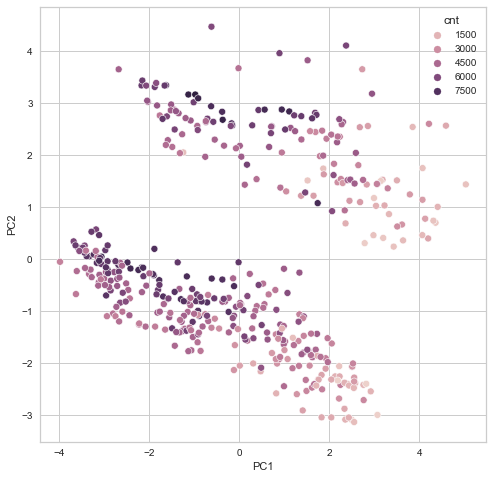

In [64]:
transformed_train = myPCA.transform(X_train_standarized[X_train.columns])
transformed_train

X_train_standarized[['PC1','PC2','PC3']] = transformed_train[:,:3]

fig = plt.figure(figsize=(8,8))
_ = sns.scatterplot(x='PC1', y='PC2', data=X_train_standarized, hue=y_train)

In [73]:
import plotly.express as px

fig = px.scatter_3d(X_train_standarized, x='PC1', y='PC2', z='PC3',color=y_train)
fig.show()

Como vemos tanto en el gráfico 2D, como 3D, únicamente con dos componentes no nos es suficente para poder separar bien los datos. Aunque si que es cierto que podemos ver un cierto patrón en estos. Podemos ver que se nos forman dos grandes grupos, donde en cada uno de estos podemos ver como el distinto número de bicicletas contadas, se agrupa gracias a su similittud. En el primer grupo de arriba en el gráfico 2D si que podemos verlo de forma un poco más clara como la separación es mas notable, aunque en el segundo grupo, vemos que los datos estan unn poco más mezclados, pero se puede empezar a intuir la distinción de la variable objectivo en base al número de biciletas contadas.

##### Como curiosidad podemos ver el gráfico de loadings i fijarnos en la longitud de los vectors que influyen en cada componente

In [74]:
loadings = myPCA.components_.T * np.sqrt(myPCA.explained_variance_ratio_)

fig = px.scatter(X_train_standarized, x='PC1', y='PC2', color=y_train)

for i, feature in enumerate(X_train.columns):
    fig.add_shape(type='line',x0=0, y0=0,x1=loadings[i, 0],y1=loadings[i, 1])
    fig.add_annotation(x=loadings[i, 0],y=loadings[i, 1],ax=0, ay=0,xanchor="center",yanchor="bottom",text=feature,)
fig.show()

#### c) La variable a predecir es un conteo. En este caso podría tener sentido utilizar un regresor que use un modelo adecuado para este tipo de datos como el $\texttt{PoissonRegressor}$ de scikit-learn. Veréis que tiene un parámetro de regularización $\texttt{alpha}$ que necesitaréis ajustar usando validación cruzada. Con el mejor parámetro de regularización según el error de validación cruzada, ajustad el modelo con los datos de entrenamiento y calculad la $\textit{calidad}$ del modelo con los datos de test.

Es importante aclara que Poisson no admite valores negativos para nuestra variable objetivo por lo que si es necesario haria falta deshacernos de ellos

In [105]:
poisson_cross_val_metrics = pd.DataFrame(columns=['mean MSE', 'mean norm_MSE', 'mean R2'])
alphas = [1e-10,1e-5,1e-4,1e-3,1e-2,0,0.1, 0.5,1,5,10,40,42,43,45,46,47,48,49,50,53,54,60,70,80,100,1000,10000]
# We calculate the cross-validation metrics for each lambda 
for alpha_val in alphas:
    kf = KFold(n_splits=10)
    i=1
    cv_mse = []
    cv_nmse = []
    cv_r2 = []

    for train_index, test_index in kf.split(X_train):
        x_train_fold = X_train.values[train_index]
        y_train_fold = y_train.values[train_index]
        x_test_fold = X_train.values[test_index,:]
        y_test_fold = y_train.values[test_index]

        pr = PoissonRegressor(alpha=alpha_val, max_iter=3000)
        pr.fit(x_train_fold,y_train_fold)
        y_pred_fold = pr.predict(x_test_fold)
        fold_mse =mean_squared_error(y_test_fold, y_pred_fold)
        fold_nmse =  1-r2_score(y_test_fold, y_pred_fold)
        fold_r2 = r2_score(y_test_fold, y_pred_fold)
        cv_mse.append(fold_mse)
        cv_nmse.append(fold_nmse)
        cv_r2.append(fold_r2)
    poisson_cross_val_metrics.loc[f'Alpha={alpha_val}',:] = [np.mean(cv_mse),np.mean(cv_nmse),np.mean(cv_r2)]

poisson_cross_val_metrics.sort_values(by='mean R2',ascending=False)

mean MSE mean norm_MSE   mean R2
Alpha=45        730413.28219      0.207387  0.792613
Alpha=43       730181.736194      0.207388  0.792612
Alpha=46         730549.5183      0.207394  0.792606
Alpha=42       730085.916685      0.207395  0.792605
Alpha=47       730698.238879      0.207406  0.792594
Alpha=48       730857.764084      0.207421  0.792579
Alpha=40       729940.903166      0.207425  0.792575
Alpha=49       731030.528411      0.207441  0.792559
Alpha=50       731212.421157      0.207464  0.792536
Alpha=53       731819.308577      0.207556  0.792444
Alpha=54        732036.85073      0.207592  0.792408
Alpha=60       733528.573667      0.207874  0.792126
Alpha=70       736512.423155      0.208525  0.791475
Alpha=80       739950.569299      0.209341  0.790659
Alpha=100      747674.781693      0.211287  0.788713
Alpha=10       743190.969032      0.213259  0.786741
Alpha=5        752129.799038      0.216585  0.783415
Alpha=1        761717.534906       0.22032   0.77968
Alpha=0.5      762725.769988      0.220869  0.779131
Alpha=0.1      764147.738237      0.221702  0.778298
Alpha=0.01     765075.035742      0.222156  0.777844
Alpha=0.001    765202.712592      0.222216  0.777784
Alpha=0        765210.582912       0.22222   0.77778
Alpha=1e-05    765213.256857      0.222221  0.777779
Alpha=1e-10    765214.946848      0.222221  0.777779
Alpha=0.0001   765221.170745      0.222223  0.777777
Alpha=1000    1191281.562361      0.334144  0.665856
Alpha=10000   2848232.659254      0.797127  0.202873

In [106]:
plt.figure(figsize = (20,1));
weights = pd.DataFrame({'poison_cv':poison_cv.coef_},index=X_train.columns)
weights.T

temp     atemp       hum  windspeed  season_1  season_2  \
poison_cv  0.347915  0.363239 -0.120689  -0.152704 -0.260324  0.048597   

           season_3  season_4      yr_0      yr_1  ...  weekday_2  weekday_3  \
poison_cv  0.042093  0.169639 -0.218961  0.218965  ...  -0.011254   -0.01115   

           weekday_4  weekday_5  weekday_6  workingday_0  workingday_1  \
poison_cv   -0.00905   0.017753   0.055969     -0.026354      0.026358   

           weathersit_1  weathersit_2  weathersit_3  
poison_cv      0.224259      0.072667     -0.296922  

[1 rows x 36 columns]

<Figure size 1440x72 with 0 Axes>

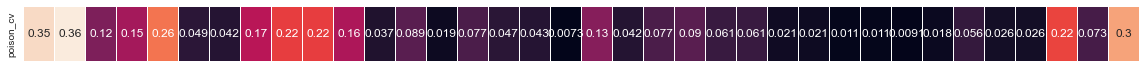

In [107]:
plt.figure(figsize = (20,1));
sns.heatmap(weights.T.loc[['poison_cv'],:].abs(),annot=True, linewidths=.5,cbar=False,xticklabels=False);

##### Vemos que la mejor alpha obtenida es 45

In [108]:
poison_cv = PoissonRegressor(alpha=45, max_iter=3000).fit(X_train,y_train);
print("Poisson coefs:\n",poison_cv.coef_);

Poisson coefs:
 [ 0.347915    0.36323938 -0.12068899 -0.15270379 -0.26032419  0.04859657
  0.04209333  0.16963851 -0.21896092  0.21896514 -0.15990269 -0.03732181
  0.08949558  0.01875728  0.07691937  0.04728547 -0.04339501  0.00725849
  0.12697059  0.04169204 -0.07732875 -0.09042633  0.06088209 -0.06087787
 -0.02144488 -0.02081747 -0.01125448 -0.0111502  -0.00905049  0.01775259
  0.05596914 -0.02635361  0.02635782  0.22425938  0.07266691 -0.29692208]


In [109]:
print("Train error:",poison_cv.score(X_train,y_train));
print("Test error:",poison_cv.score(X_test,y_test));

Train error: 0.8083039876043021
Test error: 0.8239452688714499


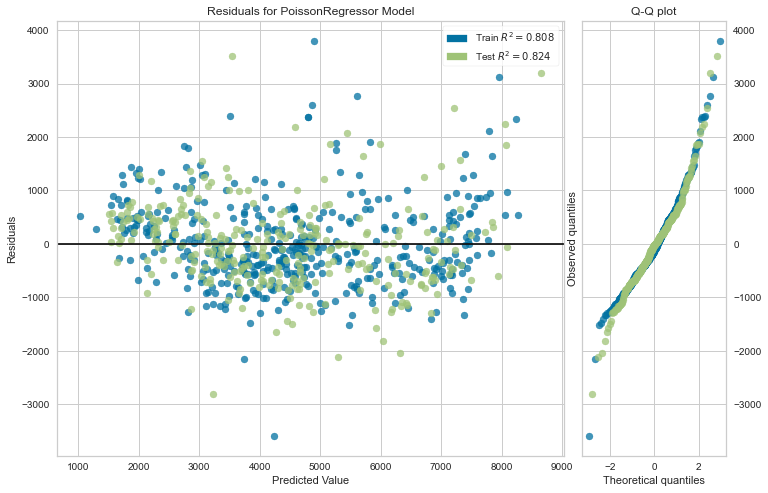

In [110]:
from yellowbrick.regressor import residuals_plot
plt.figure(figsize=(12,8));
viz = residuals_plot(poison_cv, X_train, y_train, X_test, y_test, is_fitted=True, qqplot=True, hist=False);

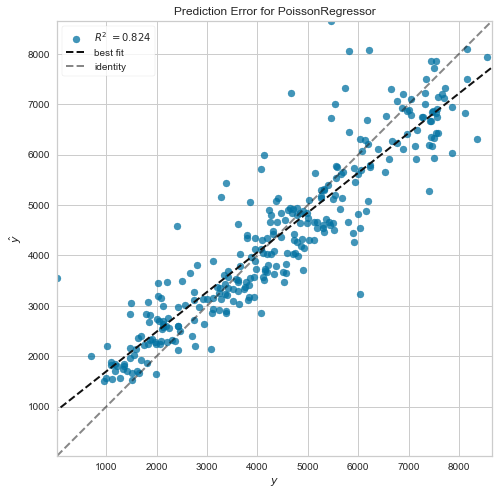

In [111]:
from yellowbrick.regressor import prediction_error

plt.figure(figsize=(8,8))
visualizer = prediction_error(poison_cv, X_test, y_test, is_fitted=True)

##### Calidad del modelo con los datos de test.

In [118]:
r2_results2 = pd.DataFrame({'poison_cv':poison_cv.score(X_test,y_test)},index=['CV R2'])
r2_results2.loc['Train R2', :] = [r2_score(y_train,poison_cv.predict(X_train))]
r2_results2.loc['lambda','poison_cv']= poison_cv.alpha
r2_results2

poison_cv
CV R2      0.823945
Train R2   0.826602
lambda    45.000000

#### d) A veces el modelo que parece adecuado no lo es tanto después de todo. Ajustad una regresión lineal a los datos y calculad la $\textit{calidad}$ del modelo empleando validación cruzada y con los datos de test.

In [119]:
lr = LinearRegression();
lr.fit(X_train,y_train);
y_pred = lr.predict(X_train);

weights = lr.coef_
intercept = lr.intercept_

print('Pesos: \n', weights[:])
print('Interceptor: \n', intercept)

Pesos: 
 [ 1.67940574e+01  4.28252773e+03 -1.36636162e+03 -8.39431390e+02
 -8.79857126e+02 -5.75496681e+00  1.04941715e+02  7.80670378e+02
 -9.79411422e+02  9.79411422e+02 -1.66702402e+02  2.14968570e+00
  3.86099792e+02  1.84217380e+02  3.89262738e+02  7.70355624e+01
 -4.99051300e+02 -1.97212653e+02  6.21387109e+02  6.32801328e+01
 -5.13089131e+02 -3.47376913e+02  2.66991842e+02 -2.66991842e+02
 -1.26511003e+02 -1.43873492e+02 -7.46313408e+01  6.44939180e+00
 -4.47509284e+01  8.84699941e+01  2.94847378e+02 -9.86554675e+01
  9.86554675e+01  8.04300435e+02  2.33922027e+02 -1.03822246e+03]
Interceptor: 
 2640.7999091361535


In [120]:
import statsmodels.api
model = sm.OLS(y_train, sm.add_constant(X_train))
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     81.00
Date:                Sun, 30 Oct 2022   Prob (F-statistic):          4.44e-148
Time:                        17:07:41   Log-Likelihood:                -3520.4
No. Observations:                 438   AIC:                             7099.
Df Residuals:                     409   BIC:                             7217.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          789.9167    109.008      7.246      0.000     575.631    1004.202
temp            16.7941   2377.175      0.007      0.994   -4656.212    4689.800
atemp         4282.5277   2422.186      1.768      0.078    -478.960    9044.015
hum          -1366.3616    358.760     -3.809      0.000   -2071.606    -661.117
windspeed     -839.4314    245.454     -3.420      0.001   -1321.940    -356.923
season_1      -682.3780    163.675     -4.169      0.000   -1004.126    -360.630
season_2       191.7242    167.210      1.147      0.252    -136.974     520.422
season_3       302.4209    162.583      1.860      0.064     -17.182     622.023
season_4       978.1495    159.014      6.151      0.000     665.563    1290.736
yr_0          -584.4531     67.602     -8.645      0.000    -717.345    -451.562
yr_1          1374.3698     65.333     21.036      0.000    1245.939    1502.800
mnth_1        -100.8760    234.589     -0.430      0.667    -562.026     360.274
mnth_2          67.9761    225.126      0.302      0.763    -374.573     510.525
mnth_3         451.9262    180.505      2.504      0.013      97.092     806.760
mnth_4         250.0438    208.913      1.197      0.232    -160.634     660.722
mnth_5         455.0891    212.963      2.137      0.033      36.451     873.728
mnth_6         142.8620    213.545      0.669      0.504    -276.920     562.644
mnth_7        -433.2249    232.847     -1.861      0.064    -890.952      24.502
mnth_8        -131.3863    229.076     -0.574      0.567    -581.699     318.926
mnth_9         687.2135    174.581      3.936      0.000     344.026    1030.401
mnth_10        129.1065    198.946      0.649      0.517    -261.977     520.190
mnth_11       -447.2627    219.120     -2.041      0.042    -878.005     -16.521
mnth_12       -281.5505    189.182     -1.488      0.137    -653.440      90.339
holiday_0      708.4159     98.644      7.182      0.000     514.503     902.329
holiday_1       81.5008    122.781      0.664      0.507    -159.861     322.862
weekday_0      -80.0453     78.197     -1.024      0.307    -233.763      73.672
weekday_1       -4.4764     95.264     -0.047      0.963    -191.745     182.792
weekday_2       64.7657     96.958      0.668      0.505    -125.832     255.363
weekday_3      145.8465     97.542      1.495      0.136     -45.900     337.593
weekday_4       94.6461     94.604      1.000      0.318     -91.324     280.616
weekday_5      227.8671     99.069      2.300      0.022      33.119     422.615
weekday_6      341.3131     77.658      4.395      0.000     188.655     493.971
workingday_0   342.7686     77.890      4.401      0.000     189.654     495.883
workingday_1   447.1481     54.416      8.217      0.000     340.179     554.117
weathersit_1  1067.6060     93.558     11.411      0.000     883.692    1251.520
weath

/Users/mac/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



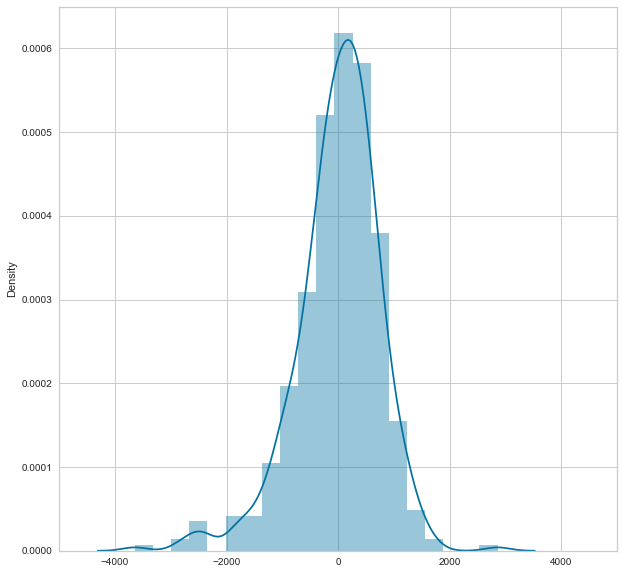

In [125]:
fig, ax = plt.subplots(figsize=(10,10))
ax.set_xlim([-5000,5000])
sns.distplot(result.resid,bins=20);

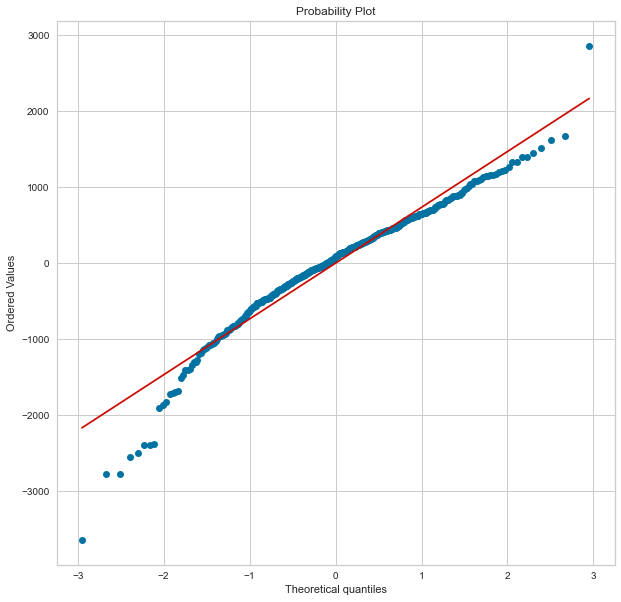

In [126]:
fig, ax = plt.subplots(figsize=(10,10))
stats.probplot(result.resid, plot=plt);

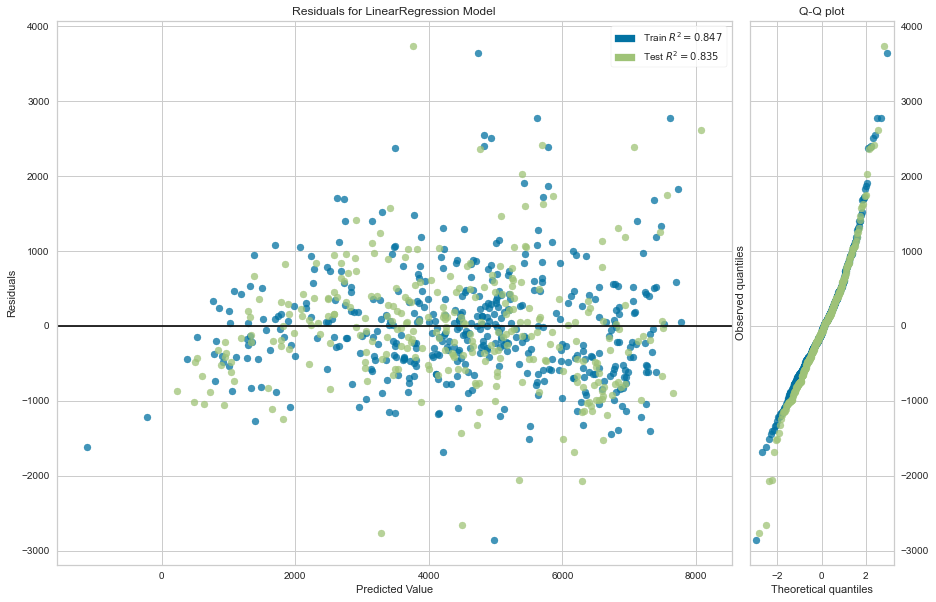

In [127]:
from yellowbrick.regressor import residuals_plot
plt.figure(figsize=(15,10));
viz = residuals_plot(lr, X_train, y_train, X_test, y_test, is_fitted=True, qqplot=True, hist=False);

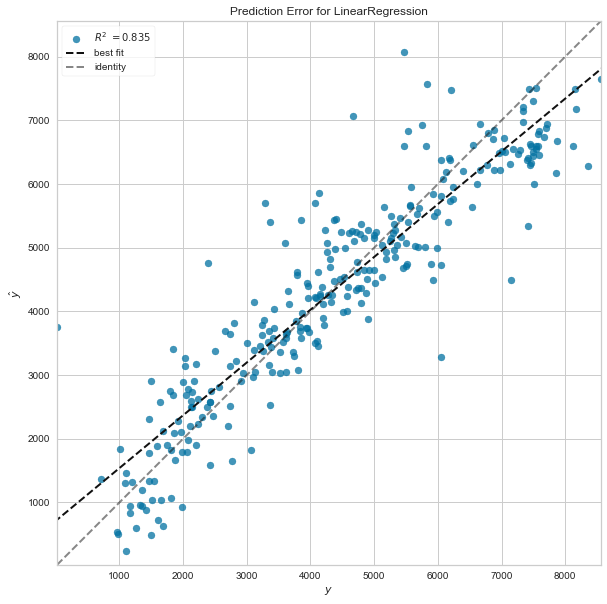

In [128]:
from yellowbrick.regressor import prediction_error

plt.figure(figsize=(15,10))
visualizer = prediction_error(lr, X_test, y_test, is_fitted=True)

##### Métricas:

In [131]:
N = X_train.shape[0]

#MSE
prediction = result.predict(sm.add_constant(X_train))
mean_square_error = np.sum((y_train - prediction)**2)/N
mean_square_error

560776.24190017

In [132]:
#NMSE Normalized vemos que el NMSE no llega a 0, lo que nos haría decir que tenemos una predicción perfecta
norm_mse_sk = 1-r2_score(y_train,prediction)
norm_mse_sk

0.15278481763857

In [133]:
# R^2 vemos que nuestro modelo de regresión lineal solo explica un ~84.72% de la variable objetivo
R_squared_sk = r2_score(y_train,prediction) 
R_squared_sk

0.84721518236143

##### Aplicamos validación cruzada

In [134]:
cross_val_metrics = pd.DataFrame(columns=['MSE', 'norm_MSE', 'R2'])

#considerar canviar la varible del kf per 5, val no és viable
kf = KFold(n_splits=10)
i=1
for train_index, test_index in kf.split(X_train):
    print('Split {}: \n\tTest Folds: [{}] \n\tTrain Folds {}'.format(i, i, [j for j in range(1,11) if j != i]));
    
    x_train_fold = X_train.values[train_index]
    y_train_fold = y_train.values[train_index]
    x_test_fold = X_train.values[test_index,:]
    y_test_fold = y_train.values[test_index]
    
    lr = LinearRegression().fit(x_train_fold,y_train_fold)
    y_pred_fold = lr.predict(x_test_fold)
    fold_mse =mean_squared_error(y_test_fold, y_pred_fold)
    fold_nmse =  1-r2_score(y_test_fold, y_pred_fold)
    fold_r2 = r2_score(y_test_fold, y_pred_fold)
    print(f'\tMSE: {fold_mse:3.3f} NMSE: {fold_nmse:3.3f} R2: {fold_r2:3.3f}')

    cross_val_metrics.loc[f'Fold {i}', :] = [fold_mse,fold_nmse, fold_r2]
    i+=1

Split 1: 
	Test Folds: [1] 
	Train Folds [2, 3, 4, 5, 6, 7, 8, 9, 10]
	MSE: 652048.705 NMSE: 0.204 R2: 0.796
Split 2: 
	Test Folds: [2] 
	Train Folds [1, 3, 4, 5, 6, 7, 8, 9, 10]
	MSE: 588646.432 NMSE: 0.158 R2: 0.842
Split 3: 
	Test Folds: [3] 
	Train Folds [1, 2, 4, 5, 6, 7, 8, 9, 10]
	MSE: 704963.591 NMSE: 0.172 R2: 0.828
Split 4: 
	Test Folds: [4] 
	Train Folds [1, 2, 3, 5, 6, 7, 8, 9, 10]
	MSE: 855878.045 NMSE: 0.202 R2: 0.798
Split 5: 
	Test Folds: [5] 
	Train Folds [1, 2, 3, 4, 6, 7, 8, 9, 10]
	MSE: 703448.715 NMSE: 0.188 R2: 0.812
Split 6: 
	Test Folds: [6] 
	Train Folds [1, 2, 3, 4, 5, 7, 8, 9, 10]
	MSE: 752461.209 NMSE: 0.336 R2: 0.664
Split 7: 
	Test Folds: [7] 
	Train Folds [1, 2, 3, 4, 5, 6, 8, 9, 10]
	MSE: 906488.614 NMSE: 0.245 R2: 0.755
Split 8: 
	Test Folds: [8] 
	Train Folds [1, 2, 3, 4, 5, 6, 7, 9, 10]
	MSE: 649299.227 NMSE: 0.162 R2: 0.838
Split 9: 
	Test Folds: [9] 
	Train Folds [1, 2, 3, 4, 5, 6, 7, 8, 10]
	MSE: 548354.203 NMSE: 0.165 R2: 0.835
Split 10: 
	Test Fo

In [135]:
cross_val_metrics.loc['Mean',:] = cross_val_metrics.mean()
cross_val_metrics

MSE  norm_MSE        R2
Fold 1   652048.704545  0.203988  0.796012
Fold 2   588646.431818   0.15839   0.84161
Fold 3   704963.590909   0.17161   0.82839
Fold 4   855878.045455  0.201739  0.798261
Fold 5   703448.715269  0.188174  0.811826
Fold 6   752461.209294  0.336225  0.663775
Fold 7   906488.613636  0.244606  0.755394
Fold 8   649299.227273  0.162089  0.837911
Fold 9   548354.203211  0.164944  0.835056
Fold 10  422287.953488  0.121061  0.878939
Mean      678387.66949  0.195283  0.804717

In [136]:
lr = LinearRegression().fit(X_train,y_train);
folds_r2 = cross_val_score(lr, X_train,y_train, cv=10, scoring='r2')
lr_r2 = np.mean(folds_r2) 
folds_r2, lr_r2

(array([0.79986496, 0.85054582, 0.83607665, 0.77372701, 0.81177534,
        0.66331706, 0.75321349, 0.85266269, 0.83556662, 0.87661021]),
 0.8053359839334165)

In [137]:
r2_results = pd.DataFrame({'lr':lr_r2},index=['CV R2'])
valorLRr2 = lr_r2
r2_results.loc['Train R2', :] =[r2_score(y_train,lr.predict(X_train))]
r2_results.loc['lambda','lr']=0
r2_results

lr
CV R2     0.805336
Train R2  0.847215
lambda    0.000000

#### RESULTADOS

In [140]:
r2_results2 = pd.DataFrame({'lr':lr_r2,'poison_cv':poison_cv.score(X_test,y_test)},index=['CV R2'])
r2_results2.loc['Train R2', :] = [r2_score(y_train,lr.predict(X_train)),
                                  r2_score(y_train,poison_cv.predict(X_train))]

r2_results2.loc['lambda','lr']=0
r2_results2.loc['lambda','poison_cv']= poison_cv.alpha
r2_results2

lr  poison_cv
CV R2     0.805336   0.823945
Train R2  0.847215   0.826602
lambda    0.000000  45.000000

Podemos ver que el modelo que ajusta mejor los datos es el modelo de Poison. Como podemos ver, este modelo no sobreajusta los datos como si ocurre con el modelo lineal.

#### e) Cuando se trata de entender un problema, es útil reducir el número de atributos en el modelo. Ajustad una regresión LASSO (ajustando la regularización usando la versión CV del modelo) y calculad la $\textit{calidad}$ del modelo con los datos de test.

In [ ]:
from sklearn.linear_model import LassoCV
from sklearn.model_selection import KFold, cross_val_score

lambdas = [1e-4,1e-3,1e-2,0.1, 0.5,1,5,10,50,100]

lasso_cv =LassoCV(alphas=lambdas,cv=5).fit(X_train,y_train)
lasso_r2 =  np.mean(cross_val_score(lasso_cv, X_train,y_train))
print('Best lambda:', lasso_cv.alpha_, 'R2 score:',lasso_r2)

In [ ]:
plt.figure(figsize=(8,8));
viz = residuals_plot(lasso_cv, X_train, y_train, X_test, y_test, is_fitted=True, qqplot=True, hist=False);

In [ ]:
y_pred = lr.predict(X_test);
plt.plot(y_pred, y_test, 'r')

#### f) Ahora podemos analizar y comparar los resultados:
* Comparad los valores pronosticados con los valores reales de los tres modelos y sus calidades. ¿Qué modelo os parece mejor? ¿Por qué?
* Analizad los pesos de la regresión lineal y LASSO. ¿Qué atributos son más importantes? ¿Hay atributos que no son relevantes?
* Comparad las predicciones de la regresión de Poisson y la regresión de LASSO. ¿Hay alguna diferencia en su comportamiento? ¿Qué creéis que está pasando?